# Factor Analysis - Charis Project Part 2

In [1]:
import sys
# !{sys.executable} -m pip install progressbar intrinio cloudpickle alphalens nltk numpy ratelimit requests scikit-learn six tqdm

In [2]:
# pip install ratelimit
# conda install -c cvxgrp cvxpy
# conda install -c conda-forge cycler
# conda install -c plotly plotly
# conda install -c anaconda pyparsing
# conda install -c anaconda pytz
# conda install scikit-learn #python 3.7.0 and rolls back conda install
# pip install zipline

In [17]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [19]:
list(calendar.month_name)[1:]

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [20]:
calendar.isleap(2020)

True

In [24]:
test_date = datetime.datetime.now() #the datetime now: year, month, date, hour, minute, 3 second, nano second

In [25]:
print(test_date)

2019-05-20 09:37:20.195090


In [27]:
print(test_date.microsecond)

195090


In [28]:
print(test_date.minute)

37


In [29]:
print(test_date.hour)

9


In [32]:
print(test_date.day)

20


In [30]:
print(test_date.month)

5


In [31]:
print(test_date.year)

2019


In [33]:
test_date.strftime('%A')

'Monday'

In [35]:
test_date.strftime('%a')

'Mon'

In [40]:
date_str = "2019-May-20"
date_object = datetime.datetime.strptime(date_str, '%Y-%b-%d') #string formating on datetime
print(date_object)

2019-05-20 00:00:00


In [43]:
from datetime import timedelta
offset = timedelta(days=1, seconds=30)
print(offset.days)
print(offset.seconds)
print(offset.microseconds)
print(type(offset))

1
30
0
<class 'datetime.timedelta'>


In [ ]:
print('futre date:', test_date, )

In [44]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [45]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [46]:
ufo['Time']=pd.to_datetime(ufo.Time)

In [48]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [49]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [53]:
ufo['day']= ufo.Time.dt.day
ufo['month']=ufo.Time.dt.month
ufo['year']=ufo.Time.dt.year
ufo['weekday_name']=ufo.Time.dt.weekday_name
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,day,month,year,weekday_name
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1,6,1930,Sunday
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,30,6,1930,Monday
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,15,2,1931,Sunday
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1,6,1931,Monday
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,18,4,1933,Tuesday


### Time Stamps

In [60]:
ts = pd.to_datetime('18/04/1933')
ts

Timestamp('1933-04-18 00:00:00')

In [61]:
type(ts)

pandas._libs.tslibs.timestamps.Timestamp

In [63]:
ufo = ufo.loc[ufo.Time>=ts, :]

In [65]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,day,month,year,weekday_name
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,18,4,1933,Tuesday
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00,15,9,1934,Saturday
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00,15,6,1935,Saturday
7,Alma,NaN,DISK,MI,1936-07-15 00:00:00,15,7,1936,Wednesday
8,Eklutna,NaN,CIGAR,AK,1936-10-15 17:00:00,15,10,1936,Thursday


In [66]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [67]:
ufo.Time.min()

Timestamp('1933-04-18 19:00:00')

In [68]:
ufo.Time.max() - ufo.Time.min()

Timedelta('24729 days 04:59:00')

### Load Packages

In [42]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pickle
from pprint import pprint
import matplotlib.pyplot as plt
import requests
import ratelimit
from ratelimit import limits, sleep_and_retry
import re
import requests
import intrinio
import intrinio_sdk
import time
from intrinio_sdk.rest import ApiException
import datetime
from datetime import timedelta
import calendar

In [5]:
cik_lookup = {'YI': '1738906', 'VNET': '1508475', 'QFIN': '1741530', 'WBAI': '1517496', 'JOBS': '1295484', 'WUBA': '1525494', 'ATV': '1365742', 'AMCN': '1413745', 'BABA': '1577552', 'ACH': '1161611', 'ATAI': '1420529', 'JG': '1737339', 'ATHM': '1527636', 'BIDU': '1329099', 'BZUN': '1625414', 'BILI': '1723690', 'BEDU': '1696355', 'CANG': '1725123', 'CYOU': '1458696', 'CMCM': '1597835', 'DL': '1438644', 'CEA': '1030475', 'JRJC': '1297830', 'LFC': '1268896', 'HTHT': '1483994', 'CHL': '1117795', 'CEO': '1095595', 'BORN': '1490366', 'COE': '1659494', 'SNP': '1123658', 'XRF': '1346610', 'ZNH': '1041668', 'CNTF': '1316317', 'CHA': '1191255', 'CHU': '1113866', 'CCIH': '1498576', 'CCM': '1472072', 'CTRP': '1269238', 'DQ': '1477641', 'EHIC': '1517492', 'SFUN': '1294404', 'FANH': '1413855', 'GDS': '1526125', 'GHG': '1724755', 'GSUM': '1647338', 'GSH': '1012139', 'HLG': '1596964', 'HQCL': '1371541', 'HX': '1702318', 'HMI': '1720446', 'HNP': '929058', 'HCM': '1648257', 'HUYA': '1728190', 'KANG': '1524190', 'IQ': '1722608', 'JD': '1549802', 'JT': '1713923', 'JKS': '1481513', 'JMU': '1527762', 'JMEI': '1597680', 'JP': '1616291', 'KZ': '1285137', 'LEJU': '1596856', 'LX': '1708259', 'LITB': '1523836', 'MOMO': '1610601', 'NTES': '1110646', 'EDU': '1372920', 'NIO': '1736541', 'NOAH': '1499543', 'ONE': '1722380', 'OSN': '1485538', 'PTR': '1108329', 'FENG': '1509646', 'PDD': '1737806', 'PPDF': '1691445', 'QD': '1692705', 'SOL': '1417892', 'RENN': '1509223', 'REDU': '1712178', 'RYB': '1708441', 'SECO': '1633441', 'SHI': '908732', 'SKYS': '1594124', 'SOGO': '1713947', 'SOHU': '1734107', 'TAL': '1499620', 'TEDU': '1592560', 'TME': '1744676', 'NCTY': '1296774', 'TC': '1743340', 'TOUR': '1597095', 'VIPS': '1529192', 'WB': '1595761', 'XYF': '1725033', 'XIN': '1398453', 'XNET': '1510593', 'YIN': '1661125', 'YRD': '1631761', 'YY': '1530238', 'ZLAB': '1704292', 'ZPIN': '1378564', 'ZTO': '1677250', 'ZXAIY': '1506756', 'LDKYQ': '1385424', 'LASLY': '1499673', 'LGFTY': '1412494', 'YZCAY': '1048098', 'ZAHLY': '1501176'}

In [6]:
tickerList = list(cik_lookup.keys())

In [152]:
from __future__ import print_function
import time
import intrinio_sdk
from intrinio_sdk.rest import ApiException
from pprint import pprint

intrinio_sdk.ApiClient().configuration.api_key['api_key'] = 'OjdhZTAyYzZhZmQxMmU3OTU5YjA1NWY5MzhmZDk1Y2E0'
company_api = intrinio_sdk.CompanyApi()
security_api = intrinio_sdk.SecurityApi()
pricing = pd.DataFrame()

In [170]:
news= {}

for identifier in tickerList:
    try:
        api_response = company_api.get_company_news(identifier, page_size=100)
        news[identifier]= api_response
    except ApiException as e:
        print("Exception when calling CompanyApi->get_company_news: %s\n" % e)

#pprint(news[identifier])
# Note: For a Pandas DataFrame, import Pandas and use pd.DataFrame(api_response.property_name_dict) 

Exception when calling CompanyApi->get_company_news: (404)
Reason: Not Found
HTTP response headers: HTTPHeaderDict({'Date': 'Mon, 20 May 2019 05:23:02 GMT', 'Content-Type': 'application/json', 'Content-Length': '113', 'Connection': 'keep-alive', 'Vary': 'Origin,Accept-Encoding'})
HTTP response body: {"error":"Company not found","message":"An error occured. Please contact success@intrinio.com with the details."}


Exception when calling CompanyApi->get_company_news: (404)
Reason: Not Found
HTTP response headers: HTTPHeaderDict({'Date': 'Mon, 20 May 2019 05:23:16 GMT', 'Content-Type': 'application/json', 'Content-Length': '113', 'Connection': 'keep-alive', 'Vary': 'Origin,Accept-Encoding'})
HTTP response body: {"error":"Company not found","message":"An error occured. Please contact success@intrinio.com with the details."}


Exception when calling CompanyApi->get_company_news: (404)
Reason: Not Found
HTTP response headers: HTTPHeaderDict({'Date': 'Mon, 20 May 2019 05:23:22 GMT', 'Content-

In [99]:
# Note: this generates access permission error
# df1 = pd.DataFrame()
# for i in tickerList:
#     df1 = intrinio.prices(identifier=i, start_date='2015-05-15', end_date='2019-05-15', frequency='daily', sort_order='asc')
#     price = pd.concat([price, df1])

In [160]:
from __future__ import print_function
import time
import intrinio_sdk
from intrinio_sdk.rest import ApiException
from pprint import pprint

# intrinio_sdk.ApiClient().configuration.api_key['api_key'] = 'YOUR_API_KEY'

company_api = intrinio_sdk.CompanyApi()

identifier = 'BABA' # str | A Company identifier (Ticker, CIK, LEI, Intrinio ID)
tag = 'marketcap' # str | An Intrinio data tag ID or code (<a href='https://data.intrinio.com/data-tags'>reference</a>)

try:
    api_response = company_api.get_company_data_point_number(identifier, tag)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling CompanyApi->get_company_data_point_number: %s\n" % e)
    

Exception when calling CompanyApi->get_company_data_point_number: (404)
Reason: Not Found
HTTP response headers: HTTPHeaderDict({'Date': 'Mon, 20 May 2019 05:11:57 GMT', 'Content-Type': 'application/json', 'Content-Length': '114', 'Connection': 'keep-alive', 'Vary': 'Origin,Accept-Encoding'})
HTTP response body: {"error":"No meaningful data","message":"An error occured. Please contact success@intrinio.com with the details."}




In [161]:
from __future__ import print_function
import time
import intrinio_sdk
from intrinio_sdk.rest import ApiException
from pprint import pprint

intrinio_sdk.ApiClient().configuration.api_key['api_key'] = 'OjdhZTAyYzZhZmQxMmU3OTU5YjA1NWY5MzhmZDk1Y2E0'

company_api = intrinio_sdk.CompanyApi()

identifier = 'com_NgYxZy' # str | A Company identifier (Ticker, CIK, LEI, Intrinio ID)
tag = 'marketcap' # str | An Intrinio data tag ID or code (<a href='https://data.intrinio.com/data-tags'>reference</a>)
frequency = 'daily' # str | Return historical data in the given frequency (optional) (default to daily)
type = '' # str | Filter by type, when applicable (optional)
start_date = '2018-01-01' # date | Get historical data on or after this date (optional)
end_date = '' # date | Get historical data on or before this date (optional)
sort_order = 'desc' # str | Sort by date `asc` or `desc` (optional) (default to desc)
page_size = 100 # int | The number of results to return (optional) (default to 100)
next_page = '' # str | Gets the next page of data from a previous API call (optional)

try:
    api_response = company_api.get_company_historical_data(identifier, tag, frequency=frequency, type=type, start_date=start_date, end_date=end_date, sort_order=sort_order, page_size=page_size, next_page=next_page)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling CompanyApi->get_company_historical_data: %s\n" % e)
    
# Note: For a Pandas DataFrame, import Pandas and use pd.DataFrame(api_response.property_name_dict) 

{'company': {'cik': '0001577552',
             'id': 'com_NgYxZy',
             'lei': '5493001NTNQJDH60PM02',
             'name': 'Alibaba Group Holding Ltd',
             'ticker': 'BABA'},
 'historical_data': [],
 'next_page': None}


In [165]:
from __future__ import print_function
import time
import intrinio_sdk
from intrinio_sdk.rest import ApiException
from pprint import pprint


intrinio_sdk.ApiClient().configuration.api_key['api_key'] = 'OjdhZTAyYzZhZmQxMmU3OTU5YjA1NWY5MzhmZDk1Y2E0'

security_api = intrinio_sdk.SecurityApi()

identifier = 'BABA' # str | A Security identifier (Ticker, FIGI, ISIN, CUSIP, Intrinio ID)
start_date = '2014-05-20' # date | Return prices on or after the date (optional)
end_date = '2019-05-20' # date | Return prices on or before the date (optional)
frequency = 'daily' # str | Return stock prices in the given frequency (optional) (default to daily)
page_size = 1000 # int | The number of results to return (optional) (default to 100)
next_page = '' # str | Gets the next page of data from a previous API call (optional)

try:
    api_response = security_api.get_security_stock_prices(identifier, start_date=start_date, end_date=end_date, frequency=frequency, page_size=page_size, next_page=next_page)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling SecurityApi->get_security_stock_prices: %s\n" % e)
    
# Note: For a Pandas DataFrame, import Pandas and use pd.DataFrame(api_response.property_name_dict) 

{'next_page': 'MjAxNS0wNS0yOXw4NTM3NTg3NjQ3',
 'security': {'code': 'DR',
              'company_id': 'com_NgYxZy',
              'composite_figi': 'BBG006G2JVL2',
              'composite_ticker': 'BABA:US',
              'currency': 'USD',
              'figi': 'BBG006G2JVQ7',
              'id': 'sec_nzJVez',
              'name': 'Alibaba Group Holding Ltd',
              'share_class_figi': 'BBG006G2JWB1',
              'ticker': 'BABA'},
 'stock_prices': [{'adj_close': 169.57,
                   'adj_high': 172.29,
                   'adj_low': 168.49,
                   'adj_open': 171.69,
                   'adj_volume': 22539384.0,
                   'close': 169.57,
                   'date': datetime.date(2019, 5, 17),
                   'frequency': 'daily',
                   'high': 172.29,
                   'intraperiod': False,
                   'low': 168.49,
                   'open': 171.69,
                   'volume': 22539384.0},
                  {'adj_close': 

In [112]:
url = 'https://api-v2.intrinio.com/securities/BABA/prices?api_key=OjdhZTAyYzZhZmQxMmU3OTU5YjA1NWY5MzhmZDk1Y2E0'

In [114]:
data = requests.get(url)

In [136]:

next_page

'MjAxOC0xMi0yNHw5MjM1NDc3MjAx'

In [133]:
data.json().keys()

dict_keys(['stock_prices', 'security', 'next_page'])

In [124]:
data.json()['security']

{'id': 'sec_nzJVez',
 'company_id': 'com_NgYxZy',
 'stock_exchange_id': 'sxg_ozMr9y',
 'name': 'Alibaba Group Holding Ltd',
 'code': 'DR',
 'currency': 'USD',
 'ticker': 'BABA',
 'composite_ticker': 'BABA:US',
 'figi': 'BBG006G2JVQ7',
 'composite_figi': 'BBG006G2JVL2',
 'share_class_figi': 'BBG006G2JWB1'}

In [122]:
pd.DataFrame(data.json()['stock_prices'])

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
0,169.57,172.2900,168.4900,171.69,22539384.0,169.57,2019-05-17,daily,172.2900,False,168.4900,171.69,22539384.0
1,175.57,178.2500,174.7500,178.18,20558337.0,175.57,2019-05-16,daily,178.2500,False,174.7500,178.18,20558337.0
2,177.60,180.2400,173.3212,177.06,37587147.0,177.60,2019-05-15,daily,180.2400,False,173.3212,177.06,37587147.0
3,174.84,175.1500,171.4800,172.75,17834687.0,174.84,2019-05-14,daily,175.1500,False,171.4800,172.75,17834687.0
4,170.01,172.4700,168.7800,169.79,22330737.0,170.01,2019-05-13,daily,172.4700,False,168.7800,169.79,22330737.0
5,178.00,180.7900,174.1000,180.18,18970388.0,178.00,2019-05-10,daily,180.7900,False,174.1000,180.18,18970388.0
6,179.04,180.6950,173.0700,175.43,22727751.0,179.04,2019-05-09,daily,180.6950,False,173.0700,175.43,22727751.0
7,179.59,183.2000,178.5800,180.95,16601219.0,179.59,2019-05-08,daily,183.2000,False,178.5800,180.95,16601219.0
8,181.43,186.4500,179.6300,186.05,22643016.0,181.43,2019-05-07,daily,186.4500,False,179.6300,186.05,22643016.0
9,188.24,189.0000,184.8300,185.17,23941223.0,188.24,2019-05-06,daily,189.0000,False,184.8300,185.17,23941223.0


In [111]:
from __future__ import print_function
import time
import intrinio_sdk
from intrinio_sdk.rest import ApiException
from pprint import pprint

intrinio_sdk.ApiClient().configuration.api_key['api_key'] = 'OjdhZTAyYzZhZmQxMmU3OTU5YjA1NWY5MzhmZDk1Y2E0'

company_api = intrinio_sdk.CompanyApi()

identifier = 'AAPL' # str | A Company identifier (Ticker, CIK, LEI, Intrinio ID)
tag = 'marketcap' # str | An Intrinio data tag ID or code (<a href='https://data.intrinio.com/data-tags'>reference</a>)
frequency = 'daily' # str | Return historical data in the given frequency (optional) (default to daily)
type = '' # str | Filter by type, when applicable (optional)
start_date = '2018-01-01' # date | Get historical data on or after this date (optional)
end_date = '' # date | Get historical data on or before this date (optional)
sort_order = 'desc' # str | Sort by date `asc` or `desc` (optional) (default to desc)
page_size = 100 # int | The number of results to return (optional) (default to 100)
next_page = '' # str | Gets the next page of data from a previous API call (optional)

try:
    api_response = company_api.get_company_historical_data(identifier, tag, frequency=frequency, type=type, start_date=start_date, end_date=end_date, sort_order=sort_order, page_size=page_size, next_page=next_page)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling CompanyApi->get_company_historical_data: %s\n" % e)

{'company': {'cik': '0000320193',
             'id': 'com_NX6GzO',
             'lei': 'HWUPKR0MPOU8FGXBT394',
             'name': 'Apple Inc',
             'ticker': 'AAPL'},
 'historical_data': [{'date': datetime.date(2019, 5, 17),
                      'value': 888422094000.0},
                     {'date': datetime.date(2019, 5, 16),
                      'value': 893498791680.0},
                     {'date': datetime.date(2019, 5, 15),
                      'value': 897447334320.0},
                     {'date': datetime.date(2019, 5, 14),
                      'value': 886823874360.0},
                     {'date': datetime.date(2019, 5, 13),
                      'value': 873003975120.0},
                     {'date': datetime.date(2019, 5, 10),
                      'value': 926873378280.0},
                     {'date': datetime.date(2019, 5, 9),
                      'value': 939894167700.0},
                     {'date': datetime.date(2019, 5, 8),
                      'va

In [72]:
# pricing = pricing.pivot(index='date', columns='ticker', values='adj_close')

In [102]:
ticker = 'BABA'
link = "https://api-v2.intrinio.com/securities/"+ ticker + "/prices?api_key=OjdhZTAyYzZhZmQxMmU3OTU5YjA1NWY5MzhmZDk1Y2E0"

In [78]:
link

'https://api-v2.intrinio.com/securities/BABA/prices?api_key=OjdhZTAyYzZhZmQxMmU3OTU5YjA1NWY5MzhmZDk1Y2E0'

In [5]:
sentiment_df = pd.read_csv('sentimentDataFrame.csv')

In [24]:
twenty_Fs_by_ticker = {}

[
  {
    cik: '1506756'
    file: '\n<TYPE>20-F\n<SEQUENCE>1\n<FILENAME>d684592d20f....
    file_date: '2019-04-26'},
  {
    cik: '1506756'
    file: '\n<TYPE>20-F\n<SEQUENCE>1\n<FILENAME>d511822d20f....
    file_date: '2018-04-27'},
  {
    cik: '1506756'
    file: '\n<TYPE>20-F\n<SEQUENCE>1\n<FILENAME>d254317d20f....
    file_date: '2017-04-28'},
  {
    cik: '1506756'
    file: '\n<TYPE>20-F\n<SEQUENCE>1\n<FILENAME>d156239d20f....
    file_date: '2016-04-28'},
  {
    cik: '1506756'
    file: '\n<TYPE>20-F\n<SEQUENCE>1\n<FILENAME>d912903d20f....
    file_date: '2015-04-30'},
]


In [32]:
sentiment_df = pd.DataFrame()

,negative,positive,uncertainty,litigious,constraining,interesting,word
9,True,False,False,False,False,False,abandon
12,True,False,False,False,False,False,abandonment
13,True,False,False,False,False,False,abandonments
51,True,False,False,False,False,False,abdicate
54,True,False,False,False,False,False,abdication


In [34]:
sentiment_bow_twenty_Fs = {}

[
  {
    negative: '[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ....
    positive: '[[50  0  0 ...  0  0  0]\n [49  0  0 ...  0  0  0...
    uncertainty: '[[0 0 3 ... 4 0 5]\n [0 0 4 ... 4 0 5]\n [0 0 3 ....
    litigious: '[[0 0 0 ... 1 0 0]\n [0 0 0 ... 1 0 0]\n [0 0 0 ....
    constraining: '[[  0   3   0   5   5   3   0  36   0   0   0   0...
    interesting: '[[  0   0   0   0  24   0   0   0   0   4   0   2...},
]


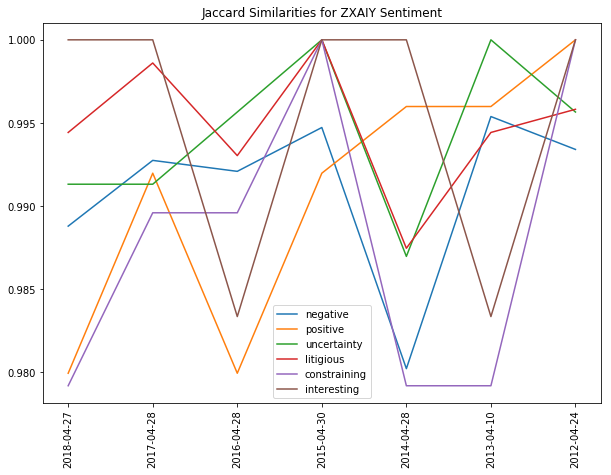

In [36]:
file_dates = {}
jaccard_similarities = {}

In [38]:
sentiment_tfidf_twenty_Fs = {}

[
  {
    negative: '[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0....
    positive: '[[0.28870737 0.         0.         ... 0.        ...
    uncertainty: '[[0.         0.         0.00685171 ... 0.00913562...
    litigious: '[[0.         0.         0.         ... 0.00441573...
    constraining: '[[0.         0.01162919 0.         0.01938198 0.0...
    interesting: '[[0.         0.         0.         0.         0.1...},
]


In [5]:
from selenium import webdriver
driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver.exe")
driver.get("https://au.finance.yahoo.com/")
assert "Yahoo Finance" in driver.title

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#morningstar

http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#Developed

https://www.alphavantage.co/documentation/

https://www.alphavantage.co/

https://github.com/intrinio/python-sdk/blob/master/docs/CompanyApi.md#get_company_historical_data

In [7]:
import json

# read in the JSON file
with open('cosine_similarities.json') as f:
    cosine_similarities = json.load(f)

In [8]:
cosine_similarities

{'YI': {'negative': [],
  'positive': [],
  'uncertainty': [],
  'litigious': [],
  'constraining': [],
  'interesting': []},
 'VNET': {'negative': [0.9965710193108945,
   0.9931677924844029,
   0.9846228038595521,
   0.9981588488950728,
   0.9913779599489607,
   0.9786554436835545,
   0.9897458727698514],
  'positive': [0.9952322918161036,
   0.9897857131715966,
   0.9955913436505652,
   0.9921371709204788,
   0.9763625712201991,
   0.9910210398814683,
   0.9865885095266187],
  'uncertainty': [0.9995198785769132,
   0.9968678137735948,
   0.9992889762040863,
   0.9991521051196961,
   0.9993909108212161,
   0.998781472650215,
   0.9985560284932556],
  'litigious': [0.9860509044556667,
   0.9854903018719527,
   0.9966038152681562,
   0.9974214085198602,
   0.9926578142572343,
   0.9938527639254024,
   0.995539117318436],
  'constraining': [0.9966623298836563,
   0.9953696306454194,
   0.9869077078130732,
   0.9972060696741226,
   0.9849050453509027,
   0.996226183648968,
   0.9945501941

In [9]:
with open('jaccard_similarities.json') as f:
    jaccard_similarities = json.load(f)

 //*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr[251]/td[1]/span

In [28]:
d = {'alls': [12312]}

In [29]:
import pandas as pd

pd.DataFrame.from_dict(d)

,alls
0,12312


In [22]:
# cosine_similarities = pd.("cosine_similarities_dictionary.txt", "w+")

comb= open("combined_tickerList_dictionary.json", "w+")

In [21]:
comb.close()

In [ ]:
abc_dict = {a:1234}

In [ ]:
abc_diction = a.txt

In [23]:
import json

json.load(comb)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# the row of data
The date of price: '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr[1]/td[1]/span'
The closing adjusted price: '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr[1]/td[6]/span'

In [ ]:
with open('jaccard_similarities_dictionary.txt', 'w') as f:
    print(jaccard_similarities, file=f)

with open('sentiment_tfidf_twenty_Fs_dictiionary.txt', 'w') as f:
    print(sentiment_tfidf_twenty_Fs, file=f)
    
with open('cosine_similarities_dictionary.txt', 'w') as f:
    print(cosine_similarities, file=f)

## Evaluate Alpha Factors
Let's evaluate the alpha factors. For this section, we'll just be looking at the cosine similarities, but it can be applied to the jaccard similarities as well.
### Price Data
Let's get yearly pricing to run the factor against, since 20-Fs are produced annually.

In [ ]:
from __future__ import print_function
import time
import intrinio_sdk
from intrinio_sdk.rest import ApiException
from pprint import pprint


In [80]:
from __future__ import print_function
import time
import intrinio_sdk
from intrinio_sdk.rest import ApiException
from pprint import pprint

intrinio_sdk.ApiClient().configuration.api_key['api_key'] = 'OjdhZTAyYzZhZmQxMmU3OTU5YjA1NWY5MzhmZDk1Y2E0'
company_api = intrinio_sdk.CompanyApi()

identifier = 'BABA' # str | A Company identifier (Ticker, CIK, LEI, Intrinio ID)
page_size = 100 # int | The number of results to return (optional) (default to 100)
next_page = '' # str | Gets the next page of data from a previous API call (optional)
news= {}
try:
    api_response = company_api.get_company_news(identifier, page_size=page_size, next_page=next_page)
    news[identifier]= api_response
except ApiException as e:
    print("Exception when calling CompanyApi->get_company_news: %s\n" % e)

pprint(news[identifier])
# Note: For a Pandas DataFrame, import Pandas and use pd.DataFrame(api_response.property_name_dict) 

In [50]:
from numba import njit, prange
import numpy as np

@njit(parallel=True)
def prange_test(A):
    s = 0
    # Without "parallel=True" in the jit-decorator
    # the prange statement is equivalent to range
    for i in prange(A.shape[0]):
        s += A[i]
    return s


@njit(parallel=True)
def prange_ftest(A):
    s = 0
    # Without "parallel=True" in the jit-decorator
    # the prange statement is equivalent to range
    for i in range(A.shape[0]):
        s += A[i]
    return s

In [51]:

a = %timeit -qo prange_test(np.ones(1000))
b = %timeit -qo prange_ftest(np.ones(1000))

In [52]:
a.average/b.average

6.694061687163667

In [30]:
d = {'YI': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'VNET': {'negative': [0.9933993399339934, 0.9907590759075907, 0.9933993399339934, 0.994059405940594, 0.9742574257425742, 0.9894389438943895, 0.9874587458745875], 'positive': [0.9879518072289156, 0.9718875502008032, 0.9839357429718876, 0.9959839357429718, 0.9799196787148594, 0.9959839357429718, 0.9759036144578314], 'uncertainty': [0.9739130434782609, 0.9869565217391304, 0.9782608695652174, 0.9782608695652174, 0.9608695652173913, 0.9826086956521739, 0.9869565217391304], 'litigious': [0.9916317991631799, 0.9944211994421199, 0.9944211994421199, 0.99721059972106, 0.9748953974895398, 0.9916317991631799, 0.9874476987447699], 'constraining': [0.9895833333333334, 1.0, 1.0, 1.0, 1.0, 0.9895833333333334, 0.9895833333333334], 'interesting': [1.0, 0.9666666666666667, 0.9833333333333333, 0.95, 1.0, 0.9833333333333333, 1.0]}, 'QFIN': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'WBAI': {'negative': [0.9907590759075907, 0.9828382838283828, 0.9933993399339934, 0.994059405940594, 0.9881188118811881], 'positive': [0.9919678714859438, 0.9558232931726908, 0.9879518072289156, 0.9959839357429718, 0.9879518072289156], 'uncertainty': [0.9956521739130435, 0.9782608695652174, 0.9826086956521739, 0.9869565217391304, 0.9826086956521739], 'litigious': [0.99860529986053, 0.9888423988842399, 0.9944211994421199, 0.99302649930265, 0.9874476987447699], 'constraining': [0.9895833333333334, 0.9895833333333334, 0.9895833333333334, 0.9791666666666666, 0.9895833333333334], 'interesting': [1.0, 1.0, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333]}, 'JOBS': {'negative': [0.9815181518151815, 0.9920792079207921, 0.9986798679867986, 0.9920792079207921, 0.9947194719471947, 0.9927392739273927, 0.9900990099009901, 0.9953795379537954, 0.9927392739273927, 0.9927392739273927, 0.9841584158415841, 0.9900990099009901, 0.9874587458745875, 0.9874587458745875], 'positive': [0.9839357429718876, 0.9919678714859438, 0.9839357429718876, 0.9799196787148594, 0.9919678714859438, 0.9839357429718876, 0.9759036144578314, 0.9879518072289156, 0.9799196787148594, 0.9598393574297188, 0.9558232931726908, 0.9839357429718876, 0.9799196787148594, 0.927710843373494], 'uncertainty': [0.9869565217391304, 0.9782608695652174, 0.9869565217391304, 0.9826086956521739, 0.991304347826087, 0.991304347826087, 0.991304347826087, 0.991304347826087, 0.9956521739130435, 0.9869565217391304, 0.991304347826087, 0.9782608695652174, 0.9869565217391304, 0.9869565217391304], 'litigious': [0.9860529986052998, 1.0, 0.99581589958159, 0.99860529986053, 0.9944211994421199, 0.9916317991631799, 0.99581589958159, 0.99581589958159, 0.99721059972106, 0.99302649930265, 0.9888423988842399, 0.9902370990237099, 0.9888423988842399, 0.9902370990237099], 'constraining': [0.9583333333333334, 1.0, 1.0, 0.9895833333333334, 0.9791666666666666, 0.9791666666666666, 0.9583333333333334, 0.9791666666666666, 0.9895833333333334, 0.9895833333333334, 0.96875, 0.9583333333333334, 0.9895833333333334, 1.0], 'interesting': [0.9666666666666667, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 1.0, 1.0, 1.0, 0.9833333333333333, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9666666666666667]}, 'WUBA': {'negative': [0.9841584158415841, 0.9887788778877887, 0.9894389438943895, 0.9914191419141914, 0.9854785478547855], 'positive': [0.9678714859437751, 0.9357429718875502, 0.9879518072289156, 0.9759036144578314, 0.9879518072289156], 'uncertainty': [0.9869565217391304, 0.9826086956521739, 0.9739130434782609, 0.9608695652173913, 0.9782608695652174], 'litigious': [0.9916317991631799, 0.9888423988842399, 0.99721059972106, 0.9944211994421199, 0.9790794979079498], 'constraining': [0.9791666666666666, 0.96875, 0.9895833333333334, 0.96875, 0.9895833333333334], 'interesting': [0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333]}, 'ATV': {'negative': [0.9782178217821782, 0.9894389438943895, 0.9848184818481848, 0.9821782178217822, 0.9590759075907591, 0.9867986798679867, 0.9788778877887789, 0.9801980198019802, 0.9848184818481848, 0.9828382838283828, 0.9841584158415841], 'positive': [0.9799196787148594, 0.9879518072289156, 0.9718875502008032, 0.9718875502008032, 0.9558232931726908, 0.9759036144578314, 0.9839357429718876, 0.9799196787148594, 0.9879518072289156, 0.9759036144578314, 0.9799196787148594], 'uncertainty': [0.9782608695652174, 0.991304347826087, 0.9956521739130435, 0.9782608695652174, 0.9695652173913043, 0.9782608695652174, 0.9782608695652174, 0.991304347826087, 0.9826086956521739, 0.9739130434782609, 0.9739130434782609], 'litigious': [0.9748953974895398, 0.99581589958159, 0.9902370990237099, 0.9818688981868898, 0.9790794979079498, 0.9888423988842399, 0.9860529986052998, 0.9832635983263598, 0.9860529986052998, 0.9776847977684798, 0.9860529986052998], 'constraining': [0.9895833333333334, 0.9895833333333334, 1.0, 0.9270833333333334, 0.9166666666666666, 0.9895833333333334, 0.96875, 0.9895833333333334, 0.9791666666666666, 0.9791666666666666, 0.9895833333333334], 'interesting': [0.9333333333333333, 0.9833333333333333, 1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667]}, 'AMCN': {'negative': [0.9801980198019802, 0.9861386138613861, 0.9861386138613861, 0.9775577557755776, 0.9854785478547855, 0.9927392739273927, 0.9755775577557756, 0.9788778877887789, 0.9815181518151815, 0.9762376237623762, 0.9881188118811881], 'positive': [0.9678714859437751, 0.9799196787148594, 0.9839357429718876, 0.9598393574297188, 0.9879518072289156, 0.9919678714859438, 0.9799196787148594, 0.9839357429718876, 0.9919678714859438, 0.9718875502008032, 0.9839357429718876], 'uncertainty': [0.9782608695652174, 0.9869565217391304, 0.991304347826087, 0.9652173913043478, 0.9956521739130435, 0.9826086956521739, 0.9739130434782609, 0.9869565217391304, 0.9695652173913043, 0.9521739130434783, 0.9565217391304348], 'litigious': [0.9860529986052998, 0.9846582984658299, 0.9902370990237099, 0.9846582984658299, 0.9888423988842399, 0.9902370990237099, 0.9832635983263598, 0.9888423988842399, 0.9776847977684798, 0.9874476987447699, 0.9888423988842399], 'constraining': [0.9895833333333334, 0.9895833333333334, 0.9895833333333334, 0.9895833333333334, 0.96875, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.96875, 0.9895833333333334, 0.9895833333333334], 'interesting': [0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 1.0, 1.0, 0.9833333333333333, 0.95, 0.9666666666666667, 0.95]}, 'BABA': {'negative': [0.974917491749175, 0.9808580858085808, 0.976897689768977], 'positive': [0.9759036144578314, 0.9678714859437751, 0.9437751004016064], 'uncertainty': [0.9739130434782609, 0.9739130434782609, 0.9652173913043478], 'litigious': [0.9888423988842399, 0.99581589958159, 0.9818688981868898], 'constraining': [0.9375, 0.9791666666666666, 0.9270833333333334], 'interesting': [0.95, 0.9666666666666667, 0.9666666666666667]}, 'ACH': {'negative': [0.9894389438943895, 0.9801980198019802, 0.9894389438943895, 0.9907590759075907, 0.9874587458745875, 0.9735973597359736, 0.9808580858085808, 0.9993399339933994, 0.9801980198019802, 0.9834983498349835, 0.9511551155115512, 0.928052805280528, 0.9155115511551155, 0.935973597359736, 0.9584158415841584, 0.9841584158415841, 0.9755775577557756, 0.998019801980198, 0.897029702970297], 'positive': [0.9718875502008032, 0.9759036144578314, 0.9759036144578314, 0.9759036144578314, 0.9879518072289156, 0.9598393574297188, 0.9598393574297188, 1.0, 0.9879518072289156, 0.9759036144578314, 0.9196787148594378, 0.927710843373494, 0.9236947791164659, 0.9236947791164659, 0.963855421686747, 0.9718875502008032, 0.9477911646586346, 1.0, 0.7108433734939759], 'uncertainty': [0.9869565217391304, 0.9826086956521739, 0.9869565217391304, 0.9956521739130435, 0.9869565217391304, 0.9478260869565217, 0.9434782608695652, 1.0, 0.9739130434782609, 0.9565217391304348, 0.908695652173913, 0.9130434782608695, 0.9217391304347826, 0.9391304347826087, 0.9478260869565217, 0.9608695652173913, 0.9521739130434783, 1.0, 0.782608695652174], 'litigious': [0.9902370990237099, 0.9902370990237099, 0.99302649930265, 0.99302649930265, 0.9916317991631799, 0.9804741980474198, 0.9902370990237099, 1.0, 0.99721059972106, 0.99721059972106, 0.9804741980474198, 0.9218967921896792, 0.9079497907949791, 0.9232914923291492, 0.9442119944211994, 0.9944211994421199, 0.9762900976290098, 1.0, 0.898186889818689], 'constraining': [0.96875, 0.9791666666666666, 0.9895833333333334, 0.9479166666666666, 0.9583333333333334, 0.9270833333333334, 0.9479166666666666, 1.0, 1.0, 0.9791666666666666, 0.90625, 0.8645833333333334, 0.7916666666666666, 0.90625, 0.8854166666666666, 0.9791666666666666, 0.9583333333333334, 1.0, 0.6666666666666666], 'interesting': [1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 0.95, 1.0, 1.0, 0.9833333333333333, 0.95, 0.9166666666666666, 0.8833333333333333, 0.9, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 1.0, 0.8166666666666667]}, 'ATAI': {'negative': [0.9722772277227723, 0.9821782178217822, 0.9815181518151815, 0.9854785478547855, 0.9782178217821782, 0.994059405940594, 0.9874587458745875, 0.9881188118811881, 0.9953795379537954, 0.9881188118811881, 0.9801980198019802], 'positive': [0.9156626506024096, 0.9678714859437751, 0.9678714859437751, 0.963855421686747, 0.9678714859437751, 0.9839357429718876, 0.9839357429718876, 0.9839357429718876, 0.9799196787148594, 0.9799196787148594, 0.9598393574297188], 'uncertainty': [0.9521739130434783, 0.9782608695652174, 0.991304347826087, 0.991304347826087, 0.9956521739130435, 0.9782608695652174, 0.9869565217391304, 0.9869565217391304, 0.9869565217391304, 0.9826086956521739, 0.9478260869565217], 'litigious': [0.9804741980474198, 0.9846582984658299, 0.9860529986052998, 0.9888423988842399, 0.9916317991631799, 0.99721059972106, 0.9860529986052998, 0.99302649930265, 0.9944211994421199, 0.9944211994421199, 0.9874476987447699], 'constraining': [0.9375, 0.9479166666666666, 0.96875, 0.9895833333333334, 0.9375, 0.9895833333333334, 0.9791666666666666, 0.9583333333333334, 1.0, 0.9895833333333334, 0.96875], 'interesting': [1.0, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9333333333333333]}, 'JG': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'ATHM': {'negative': [0.9887788778877887, 0.9848184818481848, 0.9881188118811881, 0.9900990099009901, 0.9821782178217822], 'positive': [0.9879518072289156, 0.9718875502008032, 0.9759036144578314, 0.9799196787148594, 0.963855421686747], 'uncertainty': [0.991304347826087, 0.9869565217391304, 0.9521739130434783, 0.9782608695652174, 0.9695652173913043], 'litigious': [0.9944211994421199, 0.9916317991631799, 0.9916317991631799, 0.99581589958159, 0.9902370990237099], 'constraining': [0.96875, 1.0, 0.9895833333333334, 0.9791666666666666, 0.9583333333333334], 'interesting': [1.0, 0.9666666666666667, 0.9833333333333333, 1.0, 0.9833333333333333]}, 'BIDU': {'negative': [0.9663366336633663, 0.9887788778877887, 0.9828382838283828, 0.9874587458745875, 0.9894389438943895, 0.9887788778877887, 0.976897689768977, 0.9788778877887789, 0.994059405940594, 0.9848184818481848, 0.9867986798679867, 0.9900990099009901, 0.9801980198019802], 'positive': [0.9317269076305221, 0.9397590361445783, 0.9357429718875502, 0.9518072289156626, 0.9799196787148594, 0.963855421686747, 0.9477911646586346, 0.963855421686747, 0.9718875502008032, 0.9839357429718876, 0.9759036144578314, 0.9678714859437751, 0.9799196787148594], 'uncertainty': [0.9652173913043478, 0.9869565217391304, 0.9826086956521739, 0.9826086956521739, 0.9869565217391304, 0.9782608695652174, 0.9782608695652174, 0.9652173913043478, 0.9739130434782609, 0.9695652173913043, 0.9739130434782609, 0.9695652173913043, 0.9652173913043478], 'litigious': [0.9902370990237099, 0.99581589958159, 0.9944211994421199, 0.9944211994421199, 0.9888423988842399, 0.99581589958159, 0.9874476987447699, 0.9902370990237099, 0.9804741980474198, 0.9874476987447699, 0.9846582984658299, 0.9818688981868898, 0.9804741980474198], 'constraining': [0.9895833333333334, 0.9791666666666666, 0.96875, 1.0, 0.9895833333333334, 0.9895833333333334, 0.9791666666666666, 0.8958333333333334, 0.9791666666666666, 0.9583333333333334, 0.9479166666666666, 0.9791666666666666, 0.9479166666666666], 'interesting': [0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9666666666666667, 0.95, 1.0, 0.9833333333333333, 0.95, 0.9833333333333333, 1.0, 0.9666666666666667]}, 'BZUN': {'negative': [0.9867986798679867, 0.9900990099009901, 0.9874587458745875], 'positive': [0.9678714859437751, 0.9759036144578314, 0.9919678714859438], 'uncertainty': [0.9652173913043478, 0.991304347826087, 0.9739130434782609], 'litigious': [0.99302649930265, 0.99581589958159, 0.99581589958159], 'constraining': [0.9895833333333334, 1.0, 1.0], 'interesting': [0.9666666666666667, 1.0, 1.0]}, 'BILI': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'BEDU': {'negative': [0.9900990099009901], 'positive': [0.9879518072289156], 'uncertainty': [0.9739130434782609], 'litigious': [0.9944211994421199], 'constraining': [0.96875], 'interesting': [0.95]}, 'CANG': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'CYOU': {'negative': [0.9920792079207921, 0.9947194719471947, 0.9947194719471947, 0.994059405940594, 0.9881188118811881, 0.9874587458745875, 0.976897689768977, 0.9821782178217822, 0.9854785478547855], 'positive': [0.9959839357429718, 0.9879518072289156, 1.0, 0.9678714859437751, 0.9518072289156626, 0.9799196787148594, 0.9718875502008032, 0.9678714859437751, 1.0], 'uncertainty': [0.9956521739130435, 0.9956521739130435, 0.9782608695652174, 0.991304347826087, 0.9521739130434783, 0.991304347826087, 0.9782608695652174, 0.9739130434782609, 0.9695652173913043], 'litigious': [0.9874476987447699, 0.99860529986053, 0.9902370990237099, 0.9944211994421199, 0.9832635983263598, 0.9888423988842399, 0.9762900976290098, 0.9916317991631799, 0.9776847977684798], 'constraining': [0.9895833333333334, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9270833333333334, 0.9895833333333334, 0.9375, 0.9583333333333334, 0.9375], 'interesting': [0.9833333333333333, 1.0, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9333333333333333, 0.9833333333333333, 1.0]}, 'CMCM': {'negative': [0.9854785478547855, 0.9808580858085808, 0.9920792079207921, 0.9881188118811881], 'positive': [0.9919678714859438, 0.9718875502008032, 0.9718875502008032, 0.9799196787148594], 'uncertainty': [0.9739130434782609, 0.9695652173913043, 0.991304347826087, 0.9782608695652174], 'litigious': [0.9874476987447699, 0.9874476987447699, 0.9916317991631799, 0.99302649930265], 'constraining': [0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9583333333333334], 'interesting': [0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 1.0]}, 'DL': {'negative': [0.9947194719471947, 0.9953795379537954, 0.9907590759075907, 0.9914191419141914, 0.9927392739273927, 0.9867986798679867, 0.9861386138613861, 0.9927392739273927, 0.9808580858085808, 0.9841584158415841], 'positive': [0.9919678714859438, 0.9759036144578314, 0.9718875502008032, 1.0, 0.9919678714859438, 0.9678714859437751, 0.9919678714859438, 0.9839357429718876, 0.963855421686747, 0.9799196787148594], 'uncertainty': [0.991304347826087, 0.9869565217391304, 0.991304347826087, 0.9956521739130435, 0.9956521739130435, 0.9826086956521739, 0.9869565217391304, 0.9826086956521739, 0.9739130434782609, 0.9782608695652174], 'litigious': [0.9888423988842399, 0.99581589958159, 0.9944211994421199, 0.9860529986052998, 0.9874476987447699, 0.9846582984658299, 0.9846582984658299, 0.99581589958159, 0.9874476987447699, 0.9846582984658299], 'constraining': [1.0, 0.9791666666666666, 0.9791666666666666, 0.9895833333333334, 0.9895833333333334, 0.9583333333333334, 0.9583333333333334, 0.9895833333333334, 0.9895833333333334, 0.96875], 'interesting': [1.0, 1.0, 1.0, 0.9833333333333333, 0.9833333333333333, 1.0, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333]}, 'CEA': {'negative': [0.9874587458745875, 0.9782178217821782, 0.9894389438943895, 0.9914191419141914, 0.9887788778877887, 0.9854785478547855, 0.9821782178217822, 0.9920792079207921, 0.9775577557755776, 0.9742574257425742, 0.9775577557755776, 0.9742574257425742, 0.9683168316831683, 0.9650165016501651, 0.9788778877887789, 0.9848184818481848, 0.9379537953795379], 'positive': [0.9799196787148594, 0.9598393574297188, 0.963855421686747, 0.9718875502008032, 0.9919678714859438, 0.9799196787148594, 0.9759036144578314, 0.963855421686747, 0.9558232931726908, 0.9558232931726908, 0.963855421686747, 0.9759036144578314, 0.9919678714859438, 0.9839357429718876, 0.9919678714859438, 0.9799196787148594, 0.7871485943775101], 'uncertainty': [0.9826086956521739, 0.9956521739130435, 0.9869565217391304, 0.9782608695652174, 0.991304347826087, 0.9739130434782609, 0.9782608695652174, 0.991304347826087, 0.9695652173913043, 0.9782608695652174, 0.9826086956521739, 0.9565217391304348, 0.9652173913043478, 0.9521739130434783, 0.9956521739130435, 0.9739130434782609, 0.8217391304347826], 'litigious': [0.99581589958159, 0.99302649930265, 0.9944211994421199, 0.99860529986053, 0.99302649930265, 0.9888423988842399, 0.99581589958159, 0.99302649930265, 0.9888423988842399, 0.9860529986052998, 0.9874476987447699, 0.9609483960948396, 0.9679218967921897, 0.9916317991631799, 0.9818688981868898, 0.9832635983263598, 0.9302649930264993], 'constraining': [0.96875, 0.9895833333333334, 0.9895833333333334, 0.9895833333333334, 1.0, 0.9895833333333334, 0.9895833333333334, 0.9895833333333334, 0.9583333333333334, 0.9791666666666666, 0.9791666666666666, 0.9583333333333334, 0.9791666666666666, 0.96875, 0.9479166666666666, 0.9479166666666666, 0.7083333333333334], 'interesting': [1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.95, 0.9166666666666666, 0.9333333333333333, 0.9666666666666667, 0.95, 0.9333333333333333, 0.8666666666666667]}, 'JRJC': {'negative': [0.9933993399339934, 0.9947194719471947, 0.9887788778877887, 0.9861386138613861, 0.9914191419141914, 0.9867986798679867, 0.9848184818481848, 0.9584158415841584, 0.9907590759075907, 0.9874587458745875, 0.9894389438943895, 0.9815181518151815, 0.9821782178217822, 0.994059405940594], 'positive': [0.9799196787148594, 0.9799196787148594, 0.9839357429718876, 0.9598393574297188, 0.9718875502008032, 0.9799196787148594, 0.963855421686747, 0.927710843373494, 0.9799196787148594, 0.9839357429718876, 0.9839357429718876, 0.9718875502008032, 0.9558232931726908, 0.9919678714859438], 'uncertainty': [0.9826086956521739, 0.991304347826087, 0.9869565217391304, 0.9608695652173913, 0.9826086956521739, 0.9826086956521739, 0.9826086956521739, 0.9695652173913043, 0.991304347826087, 0.9739130434782609, 0.9608695652173913, 0.9739130434782609, 0.9304347826086956, 0.9782608695652174], 'litigious': [0.9944211994421199, 0.99302649930265, 0.9860529986052998, 0.9860529986052998, 0.9874476987447699, 0.99302649930265, 0.9832635983263598, 0.9846582984658299, 0.9902370990237099, 0.9888423988842399, 0.99721059972106, 0.9888423988842399, 0.9860529986052998, 0.99721059972106], 'constraining': [0.9791666666666666, 1.0, 0.96875, 0.9895833333333334, 0.9895833333333334, 0.9791666666666666, 0.96875, 0.9375, 0.9791666666666666, 0.9895833333333334, 0.96875, 0.9479166666666666, 0.9791666666666666, 0.9895833333333334], 'interesting': [1.0, 0.9833333333333333, 0.9833333333333333, 1.0, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.95, 1.0, 1.0, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333]}, 'LFC': {'negative': [0.994059405940594, 0.9881188118811881, 0.9933993399339934, 0.9907590759075907, 0.996039603960396, 0.9894389438943895, 0.9854785478547855, 0.9907590759075907, 0.9914191419141914, 0.9696369636963696, 0.9854785478547855, 0.9927392739273927, 0.9887788778877887, 0.9834983498349835, 0.9808580858085808], 'positive': [0.9759036144578314, 0.9839357429718876, 0.9879518072289156, 0.9879518072289156, 0.9799196787148594, 0.9919678714859438, 0.9879518072289156, 0.9919678714859438, 0.9799196787148594, 0.9799196787148594, 0.9678714859437751, 1.0, 0.9839357429718876, 0.9678714859437751, 0.9839357429718876], 'uncertainty': [0.9826086956521739, 0.9782608695652174, 0.9826086956521739, 0.9869565217391304, 0.9826086956521739, 0.9739130434782609, 0.9739130434782609, 0.9869565217391304, 0.9826086956521739, 0.9652173913043478, 0.9695652173913043, 0.9695652173913043, 0.9739130434782609, 0.9739130434782609, 0.991304347826087], 'litigious': [0.99721059972106, 0.99302649930265, 0.9888423988842399, 0.9888423988842399, 0.99302649930265, 0.9902370990237099, 0.9944211994421199, 0.99721059972106, 0.99302649930265, 0.9735006973500697, 0.9902370990237099, 0.9860529986052998, 0.9888423988842399, 0.9804741980474198, 0.9916317991631799], 'constraining': [0.9895833333333334, 0.9895833333333334, 1.0, 1.0, 0.9895833333333334, 0.9791666666666666, 1.0, 1.0, 1.0, 0.9479166666666666, 0.9791666666666666, 0.9895833333333334, 0.9791666666666666, 0.9791666666666666, 0.96875], 'interesting': [0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9833333333333333, 1.0, 0.9833333333333333, 1.0, 0.9666666666666667, 0.9833333333333333]}, 'HTHT': {'negative': [0.9927392739273927, 0.9887788778877887, 0.9927392739273927, 0.9973597359735974, 0.9933993399339934, 0.9881188118811881, 0.9848184818481848, 0.974917491749175], 'positive': [0.9879518072289156, 1.0, 0.9919678714859438, 0.9879518072289156, 0.9839357429718876, 0.9839357429718876, 0.9799196787148594, 0.9879518072289156], 'uncertainty': [0.9869565217391304, 0.9826086956521739, 0.991304347826087, 0.991304347826087, 0.9869565217391304, 0.9956521739130435, 0.9869565217391304, 0.991304347826087], 'litigious': [0.99721059972106, 0.9832635983263598, 0.99721059972106, 0.99721059972106, 0.9860529986052998, 0.9902370990237099, 0.9944211994421199, 0.9874476987447699], 'constraining': [0.96875, 0.9583333333333334, 0.9791666666666666, 1.0, 0.9791666666666666, 0.96875, 0.9583333333333334, 0.96875], 'interesting': [1.0, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 1.0, 1.0, 1.0]}, 'CHL': {'negative': [0.9815181518151815, 0.9966996699669967, 0.9815181518151815, 0.9848184818481848, 0.9887788778877887, 0.9861386138613861, 0.9953795379537954, 0.9894389438943895, 0.9861386138613861, 0.9881188118811881, 0.9874587458745875, 0.9808580858085808, 0.9894389438943895, 0.9828382838283828, 0.9894389438943895, 0.9854785478547855, 0.9854785478547855, 0.9867986798679867], 'positive': [0.9357429718875502, 0.9598393574297188, 0.9477911646586346, 0.9397590361445783, 0.9879518072289156, 0.9678714859437751, 0.9759036144578314, 0.9799196787148594, 0.963855421686747, 0.9799196787148594, 0.9799196787148594, 0.9718875502008032, 0.9919678714859438, 0.9558232931726908, 0.9839357429718876, 0.9558232931726908, 0.9799196787148594, 0.9437751004016064], 'uncertainty': [0.9869565217391304, 0.9956521739130435, 0.9739130434782609, 0.991304347826087, 0.9739130434782609, 0.9869565217391304, 0.991304347826087, 0.9869565217391304, 0.9869565217391304, 0.991304347826087, 1.0, 0.9739130434782609, 0.9652173913043478, 0.9652173913043478, 0.9956521739130435, 0.991304347826087, 0.9565217391304348, 0.9739130434782609], 'litigious': [0.9902370990237099, 0.99581589958159, 0.9916317991631799, 0.99581589958159, 0.99860529986053, 0.99302649930265, 0.99860529986053, 0.99721059972106, 0.99302649930265, 0.99721059972106, 0.99721059972106, 0.9860529986052998, 0.9902370990237099, 0.9902370990237099, 0.9944211994421199, 0.9860529986052998, 0.9916317991631799, 0.9888423988842399], 'constraining': [0.96875, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.96875, 1.0, 0.9895833333333334, 1.0, 0.9895833333333334, 0.9895833333333334, 0.96875, 0.96875, 0.9583333333333334, 1.0, 0.9895833333333334, 0.9583333333333334, 0.9375], 'interesting': [0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 1.0, 1.0, 0.9666666666666667, 1.0, 0.9833333333333333, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667]}, 'CEO': {'negative': [0.9762376237623762, 0.9815181518151815, 0.9887788778877887, 0.9465346534653465, 0.9821782178217822, 0.9630363036303631, 0.9782178217821782, 0.9696369636963696, 0.9834983498349835, 0.9821782178217822, 0.9775577557755776, 0.9900990099009901, 0.974917491749175, 0.9775577557755776, 0.9425742574257425, 0.9353135313531353, 0.9663366336633663], 'positive': [0.9437751004016064, 0.9317269076305221, 0.9477911646586346, 0.8995983935742972, 0.9116465863453815, 0.9397590361445783, 0.9477911646586346, 0.9397590361445783, 0.9236947791164659, 0.9437751004016064, 0.9357429718875502, 1.0, 0.9919678714859438, 0.9558232931726908, 0.9598393574297188, 0.9357429718875502, 0.9196787148594378], 'uncertainty': [0.9695652173913043, 0.9608695652173913, 0.9739130434782609, 0.9739130434782609, 0.9695652173913043, 0.9608695652173913, 0.991304347826087, 0.9695652173913043, 0.9782608695652174, 0.9695652173913043, 0.9739130434782609, 0.9826086956521739, 0.9695652173913043, 0.9695652173913043, 0.9608695652173913, 0.9695652173913043, 0.9434782608695652], 'litigious': [0.9888423988842399, 0.9846582984658299, 0.9916317991631799, 0.9735006973500697, 0.9874476987447699, 0.9735006973500697, 0.9902370990237099, 0.9804741980474198, 0.99302649930265, 0.99302649930265, 0.9888423988842399, 0.9944211994421199, 0.9846582984658299, 0.9874476987447699, 0.9232914923291492, 0.9218967921896792, 0.9832635983263598], 'constraining': [0.96875, 0.96875, 0.96875, 0.9583333333333334, 0.9583333333333334, 0.96875, 0.9791666666666666, 0.9791666666666666, 0.9375, 0.96875, 0.9166666666666666, 0.9583333333333334, 0.96875, 0.9583333333333334, 0.90625, 0.875, 0.8958333333333334], 'interesting': [0.9833333333333333, 0.9333333333333333, 0.9833333333333333, 0.9166666666666666, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.95, 0.95, 0.9666666666666667]}, 'BORN': {'negative': [0.9821782178217822, 0.996039603960396, 0.996039603960396, 0.9920792079207921, 0.9927392739273927, 0.9947194719471947, 0.9867986798679867], 'positive': [0.9839357429718876, 0.9919678714859438, 0.9839357429718876, 0.9959839357429718, 0.9799196787148594, 0.9839357429718876, 0.9879518072289156], 'uncertainty': [0.991304347826087, 0.9782608695652174, 0.991304347826087, 0.9826086956521739, 0.9782608695652174, 0.9869565217391304, 0.991304347826087], 'litigious': [0.9902370990237099, 1.0, 0.99721059972106, 0.9944211994421199, 0.99581589958159, 0.99581589958159, 0.9902370990237099], 'constraining': [1.0, 0.9895833333333334, 0.9895833333333334, 0.9583333333333334, 0.9895833333333334, 0.9895833333333334, 1.0], 'interesting': [0.9666666666666667, 0.9833333333333333, 1.0, 1.0, 0.9833333333333333, 0.9666666666666667, 1.0]}, 'COE': {'negative': [0.9881188118811881, 0.996039603960396], 'positive': [1.0, 0.9799196787148594], 'uncertainty': [0.9869565217391304, 1.0], 'litigious': [0.9874476987447699, 0.99860529986053], 'constraining': [0.9583333333333334, 0.96875], 'interesting': [0.9666666666666667, 0.9833333333333333]}, 'SNP': {'negative': [0.9907590759075907, 0.9920792079207921, 0.9920792079207921, 0.9867986798679867, 0.9801980198019802, 0.9834983498349835, 0.9788778877887789, 0.9927392739273927, 0.9914191419141914, 0.9900990099009901, 0.9927392739273927, 0.9861386138613861, 0.9861386138613861, 0.9808580858085808, 0.9254125412541254, 0.935973597359736, 0.9115511551155115], 'positive': [0.963855421686747, 0.9799196787148594, 0.963855421686747, 0.9759036144578314, 0.9799196787148594, 0.9839357429718876, 0.9718875502008032, 0.9799196787148594, 0.9759036144578314, 0.9678714859437751, 0.9718875502008032, 0.963855421686747, 0.9879518072289156, 0.963855421686747, 0.9357429718875502, 0.9437751004016064, 0.7911646586345381], 'uncertainty': [0.9782608695652174, 0.9956521739130435, 1.0, 0.991304347826087, 0.991304347826087, 0.991304347826087, 0.991304347826087, 0.991304347826087, 1.0, 0.9826086956521739, 0.9869565217391304, 0.9739130434782609, 0.991304347826087, 0.9739130434782609, 0.9217391304347826, 0.9434782608695652, 0.7739130434782608], 'litigious': [0.9916317991631799, 0.99581589958159, 0.99302649930265, 0.99302649930265, 0.9902370990237099, 0.99302649930265, 0.99721059972106, 0.99721059972106, 1.0, 0.99721059972106, 0.99581589958159, 0.9902370990237099, 0.99302649930265, 0.9916317991631799, 0.9470013947001394, 0.9511854951185496, 0.8814504881450488], 'constraining': [0.9791666666666666, 1.0, 0.9479166666666666, 0.9791666666666666, 0.9479166666666666, 1.0, 0.9583333333333334, 0.9895833333333334, 0.9895833333333334, 0.96875, 0.96875, 0.9583333333333334, 0.9895833333333334, 0.96875, 0.8958333333333334, 0.90625, 0.6666666666666666], 'interesting': [0.9833333333333333, 0.9666666666666667, 1.0, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.95, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 1.0, 0.9666666666666667, 0.9833333333333333, 0.9, 0.9166666666666666, 0.8666666666666667]}, 'XRF': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'ZNH': {'negative': [0.9841584158415841, 0.9874587458745875, 0.976897689768977, 0.9834983498349835, 0.9788778877887789, 0.9854785478547855, 0.9914191419141914, 0.9828382838283828, 0.9861386138613861, 0.9927392739273927, 0.9762376237623762, 0.9683168316831683, 0.9782178217821782, 0.976897689768977, 0.9907590759075907, 0.9861386138613861, 0.9267326732673268], 'positive': [0.9477911646586346, 0.9357429718875502, 0.9357429718875502, 0.9759036144578314, 0.9678714859437751, 0.9959839357429718, 0.9839357429718876, 0.927710843373494, 0.9598393574297188, 0.9558232931726908, 0.9357429718875502, 0.9718875502008032, 0.9718875502008032, 0.9477911646586346, 0.9558232931726908, 0.9759036144578314, 0.8192771084337349], 'uncertainty': [0.9739130434782609, 0.9782608695652174, 0.9782608695652174, 0.9782608695652174, 0.9956521739130435, 0.9826086956521739, 0.9826086956521739, 0.9869565217391304, 0.991304347826087, 0.9739130434782609, 0.9652173913043478, 0.9782608695652174, 0.9695652173913043, 0.9565217391304348, 0.9695652173913043, 0.9478260869565217, 0.8130434782608695], 'litigious': [0.9888423988842399, 0.9846582984658299, 0.9888423988842399, 0.99581589958159, 0.9902370990237099, 0.99581589958159, 0.99581589958159, 0.9944211994421199, 0.9916317991631799, 0.9944211994421199, 0.9846582984658299, 0.9860529986052998, 0.9790794979079498, 0.9735006973500697, 0.99302649930265, 0.9846582984658299, 0.9246861924686193], 'constraining': [0.9375, 0.96875, 0.96875, 0.9895833333333334, 0.9895833333333334, 1.0, 0.9583333333333334, 1.0, 0.9895833333333334, 0.9895833333333334, 0.9791666666666666, 0.9583333333333334, 0.9583333333333334, 0.9479166666666666, 0.9375, 0.9895833333333334, 0.65625], 'interesting': [1.0, 1.0, 1.0, 0.9833333333333333, 0.95, 0.9666666666666667, 0.95, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.95, 1.0, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.85]}, 'CNTF': {'negative': [0.994059405940594, 0.9953795379537954, 0.974917491749175, 0.9821782178217822, 0.9874587458745875, 0.9861386138613861, 0.9867986798679867, 0.9815181518151815, 0.9815181518151815, 0.976897689768977, 0.9834983498349835, 0.9881188118811881], 'positive': [0.9879518072289156, 0.9759036144578314, 0.9718875502008032, 0.9759036144578314, 0.9518072289156626, 0.9558232931726908, 0.9518072289156626, 0.9759036144578314, 0.9678714859437751, 0.9598393574297188, 0.9759036144578314, 0.9799196787148594], 'uncertainty': [0.991304347826087, 0.9956521739130435, 0.9695652173913043, 0.9826086956521739, 0.9826086956521739, 0.9652173913043478, 0.9826086956521739, 0.9782608695652174, 0.9652173913043478, 0.9608695652173913, 0.9826086956521739, 0.9695652173913043], 'litigious': [0.99302649930265, 0.9902370990237099, 0.9721059972105998, 0.9776847977684798, 0.9902370990237099, 0.9776847977684798, 0.9902370990237099, 0.9916317991631799, 0.9874476987447699, 0.9888423988842399, 0.9874476987447699, 0.9874476987447699], 'constraining': [0.96875, 0.9583333333333334, 0.8854166666666666, 0.90625, 0.9791666666666666, 0.9479166666666666, 0.9583333333333334, 0.96875, 0.96875, 0.96875, 0.9895833333333334, 1.0], 'interesting': [0.9833333333333333, 1.0, 0.95, 0.9666666666666667, 1.0, 0.9833333333333333, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9666666666666667, 1.0, 0.9833333333333333]}, 'CHA': {'negative': [0.9834983498349835, 0.9775577557755776, 0.9894389438943895, 0.9894389438943895, 0.9894389438943895, 0.9927392739273927, 0.9920792079207921, 0.9887788778877887, 0.9874587458745875, 0.9907590759075907, 0.972937293729373, 0.9801980198019802, 0.9914191419141914, 0.9874587458745875, 0.9815181518151815, 0.9795379537953796], 'positive': [0.9397590361445783, 0.9718875502008032, 0.9718875502008032, 0.9799196787148594, 0.9718875502008032, 0.9678714859437751, 0.9919678714859438, 0.9759036144578314, 0.963855421686747, 0.9879518072289156, 0.9437751004016064, 0.9799196787148594, 0.9759036144578314, 0.963855421686747, 0.963855421686747, 0.9919678714859438], 'uncertainty': [0.9695652173913043, 0.9869565217391304, 0.991304347826087, 0.9826086956521739, 0.9782608695652174, 0.9956521739130435, 0.9956521739130435, 0.991304347826087, 0.991304347826087, 0.991304347826087, 0.9739130434782609, 0.9565217391304348, 0.9956521739130435, 0.9521739130434783, 0.9739130434782609, 0.9869565217391304], 'litigious': [0.9888423988842399, 0.99721059972106, 0.9888423988842399, 0.9944211994421199, 0.99302649930265, 0.9902370990237099, 0.99721059972106, 0.99860529986053, 0.99302649930265, 0.99581589958159, 0.9721059972105998, 0.9902370990237099, 0.9902370990237099, 0.9888423988842399, 0.9888423988842399, 0.9860529986052998], 'constraining': [0.9791666666666666, 0.96875, 0.9791666666666666, 1.0, 0.96875, 0.9791666666666666, 1.0, 0.9583333333333334, 0.9895833333333334, 0.9895833333333334, 0.9375, 0.9479166666666666, 0.96875, 0.96875, 0.96875, 0.9895833333333334], 'interesting': [1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.95, 1.0, 0.9833333333333333, 0.9666666666666667, 1.0, 0.9833333333333333]}, 'CHU': {'negative': [0.9887788778877887, 0.9821782178217822, 0.9848184818481848, 0.9821782178217822, 0.9775577557755776, 0.9966996699669967, 0.9927392739273927, 0.9854785478547855, 0.9848184818481848, 0.9821782178217822, 0.9577557755775578, 0.9762376237623762, 0.976897689768977, 0.9834983498349835, 0.9828382838283828, 0.9828382838283828, 0.9122112211221122], 'positive': [0.9839357429718876, 0.9477911646586346, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9718875502008032, 0.9879518072289156, 0.9799196787148594, 0.9759036144578314, 0.927710843373494, 0.8795180722891566, 0.9477911646586346, 0.9598393574297188, 0.963855421686747, 0.9718875502008032, 0.9477911646586346, 0.7550200803212851], 'uncertainty': [0.9956521739130435, 0.9956521739130435, 0.9782608695652174, 0.9826086956521739, 0.9826086956521739, 0.9869565217391304, 0.9956521739130435, 0.9695652173913043, 0.9956521739130435, 0.9739130434782609, 0.9695652173913043, 0.9869565217391304, 0.9869565217391304, 0.9608695652173913, 0.9956521739130435, 0.991304347826087, 0.8130434782608695], 'litigious': [0.99581589958159, 0.99721059972106, 0.99302649930265, 0.9846582984658299, 0.9916317991631799, 0.9944211994421199, 0.99721059972106, 0.9944211994421199, 0.9944211994421199, 0.99721059972106, 0.9832635983263598, 0.9944211994421199, 0.9902370990237099, 0.9902370990237099, 0.9832635983263598, 0.9902370990237099, 0.9135285913528591], 'constraining': [1.0, 0.9791666666666666, 0.96875, 0.9791666666666666, 0.9583333333333334, 0.9791666666666666, 0.9895833333333334, 0.9479166666666666, 0.9791666666666666, 0.9895833333333334, 0.9166666666666666, 0.9895833333333334, 0.9791666666666666, 0.96875, 0.9479166666666666, 0.9583333333333334, 0.6770833333333334], 'interesting': [1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9333333333333333, 1.0, 0.95, 0.9666666666666667, 1.0, 0.9666666666666667, 0.8166666666666667]}, 'CCIH': {'negative': [0.9881188118811881, 0.9867986798679867, 0.9900990099009901, 0.9894389438943895, 0.994059405940594, 0.9854785478547855, 0.9828382838283828], 'positive': [0.9718875502008032, 0.9839357429718876, 0.9919678714859438, 0.9919678714859438, 0.9919678714859438, 0.9718875502008032, 0.9799196787148594], 'uncertainty': [0.9869565217391304, 0.9869565217391304, 0.9956521739130435, 0.9869565217391304, 0.991304347826087, 0.9695652173913043, 0.9826086956521739], 'litigious': [0.9944211994421199, 0.9902370990237099, 0.9874476987447699, 0.9916317991631799, 0.9888423988842399, 0.9874476987447699, 0.9818688981868898], 'constraining': [0.96875, 0.9791666666666666, 1.0, 1.0, 0.9895833333333334, 0.9895833333333334, 0.9479166666666666], 'interesting': [0.9666666666666667, 1.0, 1.0, 0.9833333333333333, 1.0, 1.0, 1.0]}, 'CCM': {'negative': [0.9966996699669967, 0.996039603960396, 0.9953795379537954, 0.9907590759075907, 0.9894389438943895, 0.9861386138613861, 0.9907590759075907, 0.994059405940594, 0.9914191419141914], 'positive': [0.9879518072289156, 0.9919678714859438, 0.9959839357429718, 0.9879518072289156, 0.9959839357429718, 0.9718875502008032, 0.9959839357429718, 0.9879518072289156, 0.9759036144578314], 'uncertainty': [0.9739130434782609, 0.9956521739130435, 0.9782608695652174, 0.9695652173913043, 0.991304347826087, 0.9869565217391304, 0.9956521739130435, 0.9826086956521739, 0.9782608695652174], 'litigious': [0.99581589958159, 0.99302649930265, 0.9916317991631799, 0.9846582984658299, 0.9902370990237099, 0.9916317991631799, 0.9916317991631799, 0.9902370990237099, 0.9902370990237099], 'constraining': [1.0, 0.96875, 1.0, 0.9895833333333334, 0.9791666666666666, 0.96875, 0.96875, 1.0, 1.0], 'interesting': [0.9833333333333333, 1.0, 0.9833333333333333, 1.0, 1.0, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9666666666666667]}, 'CTRP': {'negative': [0.9907590759075907, 0.9914191419141914, 0.9914191419141914, 0.9914191419141914, 0.994059405940594, 0.9900990099009901, 0.9795379537953796, 0.9848184818481848, 0.9973597359735974, 0.9900990099009901, 0.9894389438943895, 0.9900990099009901, 0.9900990099009901, 0.9881188118811881, 0.9775577557755776], 'positive': [0.9799196787148594, 0.9718875502008032, 0.9718875502008032, 0.9718875502008032, 0.9879518072289156, 0.9799196787148594, 0.9919678714859438, 0.9919678714859438, 0.9919678714859438, 0.9879518072289156, 0.9959839357429718, 0.9759036144578314, 0.9879518072289156, 0.9718875502008032, 0.9397590361445783], 'uncertainty': [0.991304347826087, 0.9826086956521739, 0.9782608695652174, 0.9739130434782609, 0.991304347826087, 0.991304347826087, 0.9782608695652174, 0.9826086956521739, 0.9956521739130435, 0.9956521739130435, 0.9782608695652174, 0.9826086956521739, 0.9869565217391304, 0.9826086956521739, 0.9695652173913043], 'litigious': [0.99721059972106, 0.99721059972106, 0.9916317991631799, 0.99721059972106, 0.9902370990237099, 0.9916317991631799, 0.9804741980474198, 0.9902370990237099, 0.9916317991631799, 0.9832635983263598, 0.9902370990237099, 0.99302649930265, 0.9888423988842399, 0.9888423988842399, 0.9748953974895398], 'constraining': [1.0, 0.9895833333333334, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9583333333333334, 0.96875, 0.9895833333333334, 1.0, 1.0, 0.9583333333333334, 0.9791666666666666, 0.9791666666666666, 0.96875, 0.9583333333333334], 'interesting': [0.9833333333333333, 1.0, 0.9666666666666667, 0.9833333333333333, 1.0, 1.0, 0.9833333333333333, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667]}, 'DQ': {'negative': [0.9953795379537954, 0.9966996699669967, 0.9966996699669967, 0.9953795379537954, 0.9874587458745875, 0.9848184818481848, 0.9841584158415841, 0.9887788778877887], 'positive': [0.9879518072289156, 0.9879518072289156, 0.9919678714859438, 0.9959839357429718, 0.9919678714859438, 0.9718875502008032, 0.9799196787148594, 0.9879518072289156], 'uncertainty': [0.9956521739130435, 0.9826086956521739, 0.991304347826087, 0.9826086956521739, 0.9782608695652174, 0.9869565217391304, 0.9652173913043478, 0.9782608695652174], 'litigious': [0.99581589958159, 0.9916317991631799, 0.9944211994421199, 1.0, 0.9818688981868898, 0.9888423988842399, 0.9902370990237099, 0.9888423988842399], 'constraining': [0.9791666666666666, 1.0, 0.9791666666666666, 1.0, 0.96875, 0.9895833333333334, 1.0, 0.9895833333333334], 'interesting': [1.0, 1.0, 0.9833333333333333, 0.9666666666666667, 0.95, 1.0, 0.9833333333333333, 0.9833333333333333]}, 'EHIC': {'negative': [0.9920792079207921, 0.9947194719471947, 0.994059405940594], 'positive': [0.9759036144578314, 0.9879518072289156, 0.9959839357429718], 'uncertainty': [0.9782608695652174, 0.9739130434782609, 0.9869565217391304], 'litigious': [0.9860529986052998, 0.99302649930265, 0.9902370990237099], 'constraining': [0.9895833333333334, 0.9895833333333334, 0.9895833333333334], 'interesting': [0.9833333333333333, 0.9833333333333333, 0.9833333333333333]}, 'SFUN': {'negative': [0.9914191419141914, 0.9867986798679867, 0.9874587458745875, 0.994059405940594, 0.9841584158415841, 0.9907590759075907, 0.9821782178217822], 'positive': [0.9839357429718876, 0.9839357429718876, 0.9919678714859438, 0.9678714859437751, 0.9879518072289156, 1.0, 0.9799196787148594], 'uncertainty': [0.9826086956521739, 0.991304347826087, 0.9869565217391304, 0.991304347826087, 0.9739130434782609, 0.9869565217391304, 0.9695652173913043], 'litigious': [0.9846582984658299, 0.9944211994421199, 0.9790794979079498, 0.9916317991631799, 0.9832635983263598, 0.9888423988842399, 0.9832635983263598], 'constraining': [1.0, 0.9479166666666666, 0.96875, 0.96875, 0.9791666666666666, 1.0, 0.9270833333333334], 'interesting': [1.0, 0.8833333333333333, 0.9166666666666666, 1.0, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667]}, 'FANH': {'negative': [0.9762376237623762, 0.9907590759075907, 0.9907590759075907, 0.9821782178217822, 0.9881188118811881, 0.9914191419141914, 0.9933993399339934, 0.9742574257425742, 0.994059405940594, 0.9867986798679867, 0.9834983498349835], 'positive': [0.9678714859437751, 0.9839357429718876, 0.963855421686747, 0.9879518072289156, 0.9839357429718876, 0.9879518072289156, 0.9678714859437751, 0.9799196787148594, 0.9799196787148594, 0.9879518072289156, 0.9839357429718876], 'uncertainty': [0.9478260869565217, 0.9956521739130435, 0.9695652173913043, 0.9826086956521739, 0.9826086956521739, 0.9782608695652174, 0.9826086956521739, 0.991304347826087, 0.991304347826087, 0.9869565217391304, 0.991304347826087], 'litigious': [0.9707112970711297, 0.9888423988842399, 0.9860529986052998, 0.9874476987447699, 0.9874476987447699, 0.9846582984658299, 0.9916317991631799, 0.9762900976290098, 0.9916317991631799, 0.9916317991631799, 0.9888423988842399], 'constraining': [0.9479166666666666, 0.9895833333333334, 0.9479166666666666, 0.9479166666666666, 0.9479166666666666, 0.9583333333333334, 0.9895833333333334, 0.9791666666666666, 0.9895833333333334, 1.0, 0.9583333333333334], 'interesting': [0.9833333333333333, 1.0, 1.0, 0.95, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.95]}, 'GDS': {'negative': [0.9848184818481848, 0.9927392739273927], 'positive': [0.9799196787148594, 0.9799196787148594], 'uncertainty': [0.9826086956521739, 0.9826086956521739], 'litigious': [0.9860529986052998, 0.9944211994421199], 'constraining': [0.9791666666666666, 0.9895833333333334], 'interesting': [0.9833333333333333, 0.9833333333333333]}, 'GHG': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'GSUM': {'negative': [0.9874587458745875, 0.9722772277227723], 'positive': [0.9839357429718876, 0.963855421686747], 'uncertainty': [0.9782608695652174, 0.9565217391304348], 'litigious': [0.99581589958159, 0.9790794979079498], 'constraining': [1.0, 0.9791666666666666], 'interesting': [0.9833333333333333, 0.9833333333333333]}, 'GSH': {'negative': [0.9854785478547855, 0.9933993399339934, 0.9874587458745875, 0.9927392739273927, 0.9900990099009901, 0.9881188118811881, 0.9900990099009901, 0.9874587458745875, 0.9900990099009901, 0.9887788778877887, 0.9874587458745875, 0.9834983498349835, 0.9623762376237623, 0.968976897689769, 0.9775577557755776, 0.9861386138613861, 0.9267326732673268], 'positive': [0.9598393574297188, 0.9678714859437751, 0.9839357429718876, 0.9919678714859438, 0.9839357429718876, 0.9678714859437751, 0.9799196787148594, 0.9718875502008032, 0.9718875502008032, 0.9799196787148594, 0.9799196787148594, 0.9718875502008032, 0.963855421686747, 0.9558232931726908, 0.9598393574297188, 0.9678714859437751, 0.7911646586345381], 'uncertainty': [0.9869565217391304, 0.9826086956521739, 0.9782608695652174, 0.9826086956521739, 1.0, 0.9782608695652174, 0.991304347826087, 0.9956521739130435, 0.9695652173913043, 0.9739130434782609, 0.9695652173913043, 0.9652173913043478, 0.9565217391304348, 0.9391304347826087, 0.9608695652173913, 0.9565217391304348, 0.8391304347826087], 'litigious': [0.9902370990237099, 0.99581589958159, 0.9944211994421199, 0.9944211994421199, 0.99581589958159, 0.9916317991631799, 0.99302649930265, 0.9916317991631799, 0.9860529986052998, 0.99721059972106, 0.9762900976290098, 0.9874476987447699, 0.9902370990237099, 0.9776847977684798, 0.9944211994421199, 0.9860529986052998, 0.9037656903765691], 'constraining': [0.9583333333333334, 0.9791666666666666, 0.9791666666666666, 0.9895833333333334, 1.0, 0.9791666666666666, 0.9895833333333334, 0.9895833333333334, 0.9791666666666666, 1.0, 0.9895833333333334, 0.9791666666666666, 0.9895833333333334, 0.9375, 0.9791666666666666, 0.9791666666666666, 0.71875], 'interesting': [1.0, 1.0, 0.9833333333333333, 1.0, 0.95, 1.0, 1.0, 0.9833333333333333, 1.0, 1.0, 0.9666666666666667, 0.95, 0.9833333333333333, 0.9333333333333333, 0.95, 0.9833333333333333, 0.8333333333333334]}, 'HLG': {'negative': [0.9874587458745875, 0.9933993399339934, 0.9927392739273927], 'positive': [0.9477911646586346, 0.9759036144578314, 1.0], 'uncertainty': [0.9739130434782609, 0.9869565217391304, 0.991304347826087], 'litigious': [0.9916317991631799, 0.9860529986052998, 0.99581589958159], 'constraining': [0.9791666666666666, 0.9895833333333334, 1.0], 'interesting': [0.95, 1.0, 0.9833333333333333]}, 'HQCL': {'negative': [0.972937293729373, 0.9716171617161716, 0.9861386138613861, 0.9696369636963696, 0.9841584158415841, 0.9861386138613861, 0.994059405940594, 0.9815181518151815, 0.9874587458745875, 0.9788778877887789, 0.9795379537953796], 'positive': [0.9678714859437751, 0.9759036144578314, 0.9919678714859438, 0.9799196787148594, 0.9799196787148594, 0.9879518072289156, 0.9919678714859438, 0.9598393574297188, 0.9718875502008032, 0.9678714859437751, 0.9879518072289156], 'uncertainty': [0.9695652173913043, 0.9782608695652174, 0.9695652173913043, 0.9826086956521739, 0.9826086956521739, 0.9869565217391304, 0.9956521739130435, 0.9782608695652174, 0.991304347826087, 0.9695652173913043, 0.9782608695652174], 'litigious': [0.9762900976290098, 0.9860529986052998, 0.9846582984658299, 0.9832635983263598, 0.9902370990237099, 0.9860529986052998, 0.99581589958159, 0.9860529986052998, 0.9916317991631799, 0.9860529986052998, 0.9818688981868898], 'constraining': [0.9479166666666666, 0.9791666666666666, 1.0, 0.9583333333333334, 0.9791666666666666, 0.9583333333333334, 0.9895833333333334, 1.0, 1.0, 0.9791666666666666, 0.9895833333333334], 'interesting': [0.9666666666666667, 0.95, 0.9833333333333333, 1.0, 0.9833333333333333, 1.0, 1.0, 0.9666666666666667, 1.0, 0.9833333333333333, 0.9833333333333333]}, 'HX': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'HMI': {'negative': [0.9782178217821782], 'positive': [0.9718875502008032], 'uncertainty': [0.991304347826087], 'litigious': [0.9818688981868898], 'constraining': [0.9791666666666666], 'interesting': [0.9833333333333333]}, 'HNP': {'negative': [0.9828382838283828, 0.9841584158415841, 0.9907590759075907, 0.9887788778877887, 0.9828382838283828, 0.9861386138613861, 0.9782178217821782, 0.9874587458745875, 0.9867986798679867, 0.9874587458745875, 0.9722772277227723, 0.9755775577557756, 0.9755775577557756, 0.9650165016501651, 0.9815181518151815, 0.9815181518151815, 0.9254125412541254], 'positive': [0.9598393574297188, 0.9558232931726908, 0.9718875502008032, 0.9799196787148594, 0.9678714859437751, 0.963855421686747, 0.9518072289156626, 0.9558232931726908, 0.9799196787148594, 0.9718875502008032, 0.9437751004016064, 0.9718875502008032, 0.9598393574297188, 0.9437751004016064, 0.9437751004016064, 0.9437751004016064, 0.7991967871485943], 'uncertainty': [0.991304347826087, 0.991304347826087, 0.9956521739130435, 0.991304347826087, 0.991304347826087, 0.9956521739130435, 0.9956521739130435, 0.9695652173913043, 0.9869565217391304, 0.9739130434782609, 0.9521739130434783, 0.9608695652173913, 0.9695652173913043, 0.9652173913043478, 0.9695652173913043, 0.9739130434782609, 0.8130434782608695], 'litigious': [0.9916317991631799, 0.9902370990237099, 0.9916317991631799, 0.9902370990237099, 0.9860529986052998, 0.9944211994421199, 0.9944211994421199, 0.9860529986052998, 0.99721059972106, 0.99302649930265, 0.9944211994421199, 0.9944211994421199, 0.9902370990237099, 0.9567642956764296, 0.99721059972106, 0.9790794979079498, 0.9163179916317992], 'constraining': [0.96875, 0.9791666666666666, 0.9791666666666666, 0.96875, 0.9791666666666666, 0.9895833333333334, 0.9583333333333334, 0.96875, 0.9895833333333334, 0.9791666666666666, 0.9270833333333334, 0.9791666666666666, 0.9791666666666666, 0.9166666666666666, 0.9583333333333334, 0.9479166666666666, 0.7083333333333334], 'interesting': [0.9666666666666667, 1.0, 1.0, 0.95, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 1.0, 0.95, 0.9666666666666667, 0.9166666666666666, 0.95, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 1.0, 0.9]}, 'HCM': {'negative': [0.9894389438943895, 0.9861386138613861], 'positive': [0.9718875502008032, 0.9678714859437751], 'uncertainty': [0.9869565217391304, 0.9739130434782609], 'litigious': [0.99721059972106, 0.9902370990237099], 'constraining': [1.0, 0.9791666666666666], 'interesting': [0.9833333333333333, 0.9666666666666667]}, 'HUYA': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'KANG': {'negative': [0.996039603960396, 0.996039603960396, 0.996039603960396, 0.9914191419141914], 'positive': [1.0, 1.0, 0.9718875502008032, 0.9879518072289156], 'uncertainty': [0.9826086956521739, 1.0, 0.9826086956521739, 0.9956521739130435], 'litigious': [0.9944211994421199, 1.0, 0.99721059972106, 0.9902370990237099], 'constraining': [0.9791666666666666, 0.9895833333333334, 1.0, 0.9895833333333334], 'interesting': [0.9833333333333333, 1.0, 1.0, 0.9833333333333333]}, 'IQ': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'JD': {'negative': [0.9874587458745875, 0.9874587458745875, 0.9887788778877887, 0.9947194719471947], 'positive': [0.9799196787148594, 0.9518072289156626, 0.9879518072289156, 0.9839357429718876], 'uncertainty': [0.9782608695652174, 0.9869565217391304, 0.9826086956521739, 0.9826086956521739], 'litigious': [0.9916317991631799, 0.99302649930265, 0.9874476987447699, 0.99581589958159], 'constraining': [0.9791666666666666, 0.9895833333333334, 0.9895833333333334, 1.0], 'interesting': [0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 1.0]}, 'JT': {'negative': [0.9795379537953796], 'positive': [0.9839357429718876], 'uncertainty': [0.991304347826087], 'litigious': [0.9735006973500697], 'constraining': [0.96875], 'interesting': [1.0]}, 'JKS': {'negative': [0.994059405940594, 0.9927392739273927, 0.9821782178217822, 0.9894389438943895, 0.9782178217821782, 0.9841584158415841, 0.976897689768977, 0.974917491749175], 'positive': [0.9718875502008032, 0.9919678714859438, 0.9598393574297188, 0.9959839357429718, 0.9678714859437751, 0.963855421686747, 0.9718875502008032, 0.9437751004016064], 'uncertainty': [0.9956521739130435, 1.0, 0.9739130434782609, 0.9782608695652174, 0.9739130434782609, 0.9695652173913043, 0.9739130434782609, 0.9565217391304348], 'litigious': [0.9916317991631799, 0.9916317991631799, 0.9860529986052998, 0.9888423988842399, 0.9804741980474198, 0.9846582984658299, 0.9748953974895398, 0.9693165969316597], 'constraining': [0.9791666666666666, 0.9791666666666666, 0.9270833333333334, 0.9583333333333334, 0.9479166666666666, 0.9479166666666666, 0.9895833333333334, 0.9791666666666666], 'interesting': [0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 1.0]}, 'JMU': {'negative': [0.9914191419141914, 0.974917491749175, 0.9432343234323433], 'positive': [0.9839357429718876, 0.9879518072289156, 0.927710843373494], 'uncertainty': [0.991304347826087, 0.991304347826087, 0.9260869565217391], 'litigious': [0.9944211994421199, 0.9916317991631799, 0.9567642956764296], 'constraining': [1.0, 0.9583333333333334, 0.90625], 'interesting': [1.0, 1.0, 0.95]}, 'JMEI': {'negative': [0.9900990099009901, 0.9947194719471947, 0.9920792079207921, 0.9894389438943895], 'positive': [0.9919678714859438, 0.9919678714859438, 1.0, 0.9959839357429718], 'uncertainty': [0.9782608695652174, 0.9782608695652174, 0.991304347826087, 0.9782608695652174], 'litigious': [0.9888423988842399, 0.9944211994421199, 0.99581589958159, 0.9916317991631799], 'constraining': [0.9791666666666666, 0.9791666666666666, 0.9895833333333334, 0.96875], 'interesting': [1.0, 0.9666666666666667, 1.0, 0.9833333333333333]}, 'JP': {'negative': [0.9808580858085808, 0.9881188118811881, 0.9854785478547855], 'positive': [0.9718875502008032, 0.9839357429718876, 0.9799196787148594], 'uncertainty': [0.9739130434782609, 0.991304347826087, 0.9826086956521739], 'litigious': [0.9888423988842399, 0.99302649930265, 0.9860529986052998], 'constraining': [0.9791666666666666, 1.0, 0.9895833333333334], 'interesting': [0.9833333333333333, 0.9166666666666666, 0.9833333333333333]}, 'KZ': {'negative': [0.9894389438943895, 0.994059405940594, 0.996039603960396, 0.9927392739273927, 0.9914191419141914, 0.9920792079207921, 0.9735973597359736, 0.9867986798679867, 0.9874587458745875, 0.9821782178217822, 0.9775577557755776], 'positive': [0.9879518072289156, 0.9879518072289156, 0.9919678714859438, 0.9919678714859438, 0.9598393574297188, 0.9839357429718876, 0.9357429718875502, 0.9759036144578314, 0.9718875502008032, 0.9759036144578314, 0.9759036144578314], 'uncertainty': [0.9826086956521739, 0.9826086956521739, 0.991304347826087, 0.991304347826087, 0.991304347826087, 0.9826086956521739, 0.9478260869565217, 0.9652173913043478, 0.9608695652173913, 0.9782608695652174, 0.9652173913043478], 'litigious': [0.9846582984658299, 0.9846582984658299, 0.9944211994421199, 0.9874476987447699, 0.99721059972106, 0.9902370990237099, 0.9707112970711297, 0.99581589958159, 0.99302649930265, 0.9944211994421199, 0.99302649930265], 'constraining': [0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9895833333333334, 0.9791666666666666, 0.90625, 0.96875, 0.9895833333333334, 0.9791666666666666, 0.9375], 'interesting': [0.9833333333333333, 0.9666666666666667, 1.0, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667]}, 'LEJU': {'negative': [0.998019801980198, 0.9927392739273927, 0.9966996699669967, 0.9914191419141914], 'positive': [0.9919678714859438, 0.9799196787148594, 0.9879518072289156, 0.9959839357429718], 'uncertainty': [0.9826086956521739, 0.9826086956521739, 0.9956521739130435, 0.9695652173913043], 'litigious': [0.99581589958159, 0.99581589958159, 0.99302649930265, 0.99860529986053], 'constraining': [0.9791666666666666, 1.0, 0.9895833333333334, 0.9895833333333334], 'interesting': [1.0, 0.9833333333333333, 1.0, 1.0]}, 'LX': {'negative': [0.9900990099009901], 'positive': [0.9959839357429718], 'uncertainty': [0.9739130434782609], 'litigious': [0.9790794979079498], 'constraining': [0.96875], 'interesting': [1.0]}, 'LITB': {'negative': [0.9854785478547855, 0.9966996699669967, 0.9927392739273927, 0.9920792079207921, 0.9867986798679867], 'positive': [0.9799196787148594, 1.0, 0.9919678714859438, 0.9919678714859438, 0.9879518072289156], 'uncertainty': [0.9608695652173913, 0.9956521739130435, 0.9869565217391304, 0.9826086956521739, 0.9695652173913043], 'litigious': [0.9874476987447699, 0.99860529986053, 0.9944211994421199, 0.9902370990237099, 0.9902370990237099], 'constraining': [0.96875, 0.9895833333333334, 0.9895833333333334, 0.9895833333333334, 0.9583333333333334], 'interesting': [1.0, 1.0, 1.0, 1.0, 1.0]}, 'MOMO': {'negative': [0.9867986798679867, 0.9861386138613861, 0.9848184818481848, 0.9874587458745875], 'positive': [0.9718875502008032, 0.9598393574297188, 0.9678714859437751, 0.9879518072289156], 'uncertainty': [0.9826086956521739, 0.9826086956521739, 0.991304347826087, 0.9782608695652174], 'litigious': [0.9944211994421199, 0.9902370990237099, 0.9916317991631799, 0.9944211994421199], 'constraining': [0.9895833333333334, 0.9583333333333334, 0.96875, 0.9895833333333334], 'interesting': [0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333]}, 'NTES': {'negative': [0.9834983498349835, 0.9808580858085808, 0.996039603960396, 0.9900990099009901, 0.9867986798679867, 0.9900990099009901, 0.996039603960396, 0.9795379537953796, 0.9953795379537954, 0.9854785478547855, 0.9914191419141914, 0.9874587458745875, 0.9650165016501651, 0.9854785478547855, 0.9808580858085808, 0.9742574257425742, 0.8739273927392739], 'positive': [0.9799196787148594, 0.9678714859437751, 0.9879518072289156, 0.9799196787148594, 0.9879518072289156, 0.9759036144578314, 0.9919678714859438, 0.963855421686747, 0.9879518072289156, 0.9718875502008032, 0.9678714859437751, 0.9759036144578314, 0.9598393574297188, 0.9839357429718876, 0.9799196787148594, 0.9437751004016064, 0.7108433734939759], 'uncertainty': [0.991304347826087, 0.9739130434782609, 0.991304347826087, 0.991304347826087, 0.9826086956521739, 0.9826086956521739, 0.991304347826087, 0.9956521739130435, 0.9869565217391304, 0.9695652173913043, 0.9782608695652174, 0.9956521739130435, 0.9782608695652174, 0.9956521739130435, 0.9739130434782609, 0.9565217391304348, 0.7782608695652173], 'litigious': [0.9874476987447699, 0.9902370990237099, 1.0, 0.9860529986052998, 0.9860529986052998, 0.9902370990237099, 0.99581589958159, 0.99721059972106, 0.9916317991631799, 0.9874476987447699, 0.9860529986052998, 0.99302649930265, 0.9832635983263598, 0.9874476987447699, 0.9776847977684798, 0.9888423988842399, 0.891213389121339], 'constraining': [0.9583333333333334, 0.9895833333333334, 1.0, 0.9791666666666666, 0.9583333333333334, 1.0, 1.0, 0.96875, 0.9791666666666666, 0.9375, 0.9791666666666666, 0.96875, 0.9166666666666666, 0.9895833333333334, 0.9375, 0.9791666666666666, 0.6770833333333334], 'interesting': [0.9833333333333333, 0.9333333333333333, 0.9833333333333333, 0.9666666666666667, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.85]}, 'EDU': {'negative': [0.9795379537953796, 0.9966996699669967, 0.976897689768977, 0.9927392739273927, 0.994059405940594, 0.9933993399339934, 0.9650165016501651, 0.9900990099009901, 0.9887788778877887, 0.9874587458745875, 0.9874587458745875], 'positive': [0.9799196787148594, 0.9919678714859438, 0.9839357429718876, 0.9759036144578314, 0.9879518072289156, 0.9959839357429718, 0.9799196787148594, 0.9879518072289156, 0.9799196787148594, 0.9839357429718876, 0.9759036144578314], 'uncertainty': [0.9782608695652174, 0.9869565217391304, 0.9565217391304348, 0.991304347826087, 0.9869565217391304, 0.9652173913043478, 0.9565217391304348, 0.9869565217391304, 0.9826086956521739, 0.9521739130434783, 0.9652173913043478], 'litigious': [0.9748953974895398, 0.99721059972106, 0.9790794979079498, 0.9874476987447699, 0.9916317991631799, 0.9860529986052998, 0.9735006973500697, 0.9860529986052998, 0.99302649930265, 0.9902370990237099, 0.9916317991631799], 'constraining': [0.9791666666666666, 1.0, 0.9583333333333334, 0.9583333333333334, 1.0, 0.96875, 0.96875, 1.0, 1.0, 1.0, 1.0], 'interesting': [1.0, 0.9833333333333333, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 0.9833333333333333, 0.9666666666666667, 1.0]}, 'NIO': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'NOAH': {'negative': [0.9874587458745875, 0.966996699669967, 0.9821782178217822, 0.9848184818481848, 0.9742574257425742, 0.9861386138613861, 0.9927392739273927, 0.9795379537953796], 'positive': [0.963855421686747, 0.9317269076305221, 0.9759036144578314, 0.9759036144578314, 0.9558232931726908, 0.9759036144578314, 0.9919678714859438, 0.9959839357429718], 'uncertainty': [0.9739130434782609, 0.9565217391304348, 0.9695652173913043, 0.9739130434782609, 0.9782608695652174, 0.9695652173913043, 0.9869565217391304, 0.9826086956521739], 'litigious': [0.9916317991631799, 0.9860529986052998, 0.9776847977684798, 0.9944211994421199, 0.9776847977684798, 0.9832635983263598, 0.9916317991631799, 0.9916317991631799], 'constraining': [0.96875, 0.9479166666666666, 0.96875, 0.9895833333333334, 0.9375, 0.9583333333333334, 0.9583333333333334, 0.96875], 'interesting': [1.0, 0.95, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 1.0]}, 'ONE': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'OSN': {'negative': [0.994059405940594, 0.9927392739273927, 0.9920792079207921, 0.9927392739273927, 0.9874587458745875, 0.9848184818481848, 0.9801980198019802, 0.974917491749175], 'positive': [0.9959839357429718, 0.9839357429718876, 0.9879518072289156, 0.9718875502008032, 0.9839357429718876, 0.9718875502008032, 0.9879518072289156, 0.963855421686747], 'uncertainty': [0.9782608695652174, 0.9739130434782609, 0.9782608695652174, 0.991304347826087, 0.991304347826087, 0.9826086956521739, 0.9956521739130435, 0.9521739130434783], 'litigious': [0.99721059972106, 0.99860529986053, 0.99581589958159, 0.99721059972106, 0.99581589958159, 0.99581589958159, 0.99302649930265, 0.9721059972105998], 'constraining': [0.9895833333333334, 1.0, 1.0, 0.9791666666666666, 0.9479166666666666, 0.9791666666666666, 0.9791666666666666, 0.9375], 'interesting': [1.0, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 1.0, 0.95]}, 'PTR': {'negative': [0.974917491749175, 0.9861386138613861, 0.9874587458745875, 0.9900990099009901, 0.9881188118811881, 0.9854785478547855, 0.9894389438943895, 0.9881188118811881, 0.9702970297029703, 0.9861386138613861, 0.9841584158415841, 0.9834983498349835, 0.9841584158415841, 0.9801980198019802, 0.9742574257425742, 0.9881188118811881, 0.9841584158415841], 'positive': [0.9598393574297188, 0.9799196787148594, 0.9718875502008032, 0.9718875502008032, 0.9799196787148594, 0.9839357429718876, 0.9879518072289156, 0.9919678714859438, 0.9477911646586346, 0.9799196787148594, 0.9598393574297188, 0.9959839357429718, 1.0, 0.9879518072289156, 0.963855421686747, 0.9879518072289156, 0.9959839357429718], 'uncertainty': [0.9652173913043478, 1.0, 0.991304347826087, 1.0, 0.9956521739130435, 1.0, 1.0, 0.9826086956521739, 0.9782608695652174, 0.9869565217391304, 0.9869565217391304, 0.9826086956521739, 0.9695652173913043, 0.9565217391304348, 0.991304347826087, 0.9826086956521739, 0.9782608695652174], 'litigious': [0.9748953974895398, 0.9846582984658299, 0.9888423988842399, 0.9888423988842399, 0.9916317991631799, 0.9888423988842399, 0.99581589958159, 0.99581589958159, 0.9721059972105998, 0.9916317991631799, 0.9944211994421199, 0.9874476987447699, 0.9916317991631799, 0.9874476987447699, 0.9748953974895398, 0.99302649930265, 0.9944211994421199], 'constraining': [0.9479166666666666, 0.96875, 0.9895833333333334, 0.96875, 0.9895833333333334, 1.0, 0.9895833333333334, 0.9791666666666666, 0.9270833333333334, 0.9791666666666666, 0.9791666666666666, 0.9895833333333334, 0.96875, 0.96875, 0.9479166666666666, 0.96875, 0.9895833333333334], 'interesting': [0.9833333333333333, 1.0, 1.0, 1.0, 1.0, 0.9833333333333333, 1.0, 0.9833333333333333, 1.0, 0.9833333333333333, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 0.9833333333333333, 0.9833333333333333]}, 'FENG': {'negative': [0.9854785478547855, 0.9881188118811881, 0.9867986798679867, 0.9933993399339934, 0.9894389438943895, 0.9914191419141914, 0.9887788778877887], 'positive': [0.9879518072289156, 0.9879518072289156, 0.9678714859437751, 0.9799196787148594, 0.9799196787148594, 0.9919678714859438, 0.9839357429718876], 'uncertainty': [0.9869565217391304, 0.991304347826087, 0.9826086956521739, 0.9826086956521739, 0.9826086956521739, 0.991304347826087, 0.9956521739130435], 'litigious': [0.9874476987447699, 0.9888423988842399, 0.9944211994421199, 0.99302649930265, 0.9832635983263598, 0.99302649930265, 0.99860529986053], 'constraining': [0.9895833333333334, 0.9895833333333334, 0.9583333333333334, 0.9791666666666666, 0.9895833333333334, 0.9895833333333334, 1.0], 'interesting': [1.0, 1.0, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9833333333333333, 1.0]}, 'PDD': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'PPDF': {'negative': [0.9874587458745875], 'positive': [0.9879518072289156], 'uncertainty': [0.991304347826087], 'litigious': [0.9888423988842399], 'constraining': [0.9479166666666666], 'interesting': [0.9833333333333333]}, 'QD': {'negative': [0.9874587458745875], 'positive': [0.9919678714859438], 'uncertainty': [0.9782608695652174], 'litigious': [0.9874476987447699], 'constraining': [0.9895833333333334], 'interesting': [1.0]}, 'SOL': {'negative': [0.9933993399339934, 0.926072607260726, 0.9874587458745875, 0.9894389438943895, 0.9881188118811881, 0.9887788778877887, 0.9828382838283828, 0.9841584158415841, 0.9867986798679867, 0.9828382838283828, 0.9584158415841584], 'positive': [0.9839357429718876, 0.9317269076305221, 0.9879518072289156, 0.9799196787148594, 1.0, 0.963855421686747, 0.9397590361445783, 0.9678714859437751, 0.963855421686747, 0.963855421686747, 0.9718875502008032], 'uncertainty': [0.9652173913043478, 0.9478260869565217, 0.991304347826087, 0.9869565217391304, 0.9956521739130435, 0.9869565217391304, 0.9826086956521739, 0.9869565217391304, 0.9782608695652174, 0.9695652173913043, 0.9347826086956522], 'litigious': [0.99581589958159, 0.9581589958158996, 0.9874476987447699, 0.9944211994421199, 0.9846582984658299, 0.9888423988842399, 0.9846582984658299, 0.9874476987447699, 0.99302649930265, 0.9874476987447699, 0.9707112970711297], 'constraining': [0.9791666666666666, 0.9375, 0.9895833333333334, 1.0, 0.9791666666666666, 0.9791666666666666, 0.9895833333333334, 0.96875, 0.9479166666666666, 0.9583333333333334, 0.9583333333333334], 'interesting': [0.9833333333333333, 0.9166666666666666, 1.0, 1.0, 0.9666666666666667, 0.9833333333333333, 1.0, 0.9833333333333333, 1.0, 1.0, 0.9666666666666667]}, 'RENN': {'negative': [0.968976897689769, 0.9894389438943895, 0.9755775577557756, 0.974917491749175, 0.9854785478547855, 0.9801980198019802], 'positive': [0.9236947791164659, 0.9518072289156626, 0.9558232931726908, 0.9799196787148594, 0.9839357429718876, 0.9518072289156626], 'uncertainty': [0.9608695652173913, 0.9739130434782609, 0.9608695652173913, 0.9695652173913043, 0.991304347826087, 0.9739130434782609], 'litigious': [0.9832635983263598, 0.9902370990237099, 0.9776847977684798, 0.9790794979079498, 0.9846582984658299, 0.9860529986052998], 'constraining': [0.9375, 0.9791666666666666, 0.9583333333333334, 0.9583333333333334, 1.0, 0.9583333333333334], 'interesting': [0.9333333333333333, 1.0, 0.9666666666666667, 0.8833333333333333, 0.9833333333333333, 1.0]}, 'REDU': {'negative': [0.9867986798679867], 'positive': [0.9879518072289156], 'uncertainty': [0.9826086956521739], 'litigious': [0.9776847977684798], 'constraining': [0.96875], 'interesting': [0.9833333333333333]}, 'RYB': {'negative': [0.9841584158415841], 'positive': [0.9759036144578314], 'uncertainty': [0.9739130434782609], 'litigious': [0.9721059972105998], 'constraining': [0.9895833333333334], 'interesting': [0.9833333333333333]}, 'SECO': {'negative': [0.9953795379537954], 'positive': [0.9799196787148594], 'uncertainty': [0.9826086956521739], 'litigious': [0.99302649930265], 'constraining': [1.0], 'interesting': [1.0]}, 'SHI': {'negative': [0.9795379537953796, 0.9821782178217822, 0.9966996699669967, 0.9914191419141914, 0.9775577557755776, 0.9663366336633663, 0.976897689768977, 0.9788778877887789, 0.9735973597359736, 0.9815181518151815, 0.9834983498349835, 0.9841584158415841, 0.9881188118811881, 0.9788778877887789, 0.9914191419141914, 0.9854785478547855, 0.9016501650165016], 'positive': [0.9558232931726908, 0.9718875502008032, 0.9919678714859438, 0.9678714859437751, 0.9397590361445783, 0.9357429718875502, 0.9076305220883534, 0.9357429718875502, 0.9437751004016064, 0.9518072289156626, 0.9718875502008032, 0.9678714859437751, 0.963855421686747, 0.9678714859437751, 0.9919678714859438, 0.9759036144578314, 0.7590361445783133], 'uncertainty': [0.9869565217391304, 0.9869565217391304, 0.9826086956521739, 0.9869565217391304, 0.9782608695652174, 0.9608695652173913, 0.9782608695652174, 0.9652173913043478, 0.9608695652173913, 0.9869565217391304, 0.9826086956521739, 0.9695652173913043, 0.991304347826087, 0.9608695652173913, 0.9826086956521739, 0.9869565217391304, 0.7956521739130434], 'litigious': [0.9860529986052998, 0.9944211994421199, 0.99581589958159, 0.9944211994421199, 0.9804741980474198, 0.9846582984658299, 0.99302649930265, 0.9874476987447699, 0.9944211994421199, 0.99721059972106, 0.99860529986053, 0.9944211994421199, 0.9860529986052998, 0.9888423988842399, 0.99581589958159, 0.9902370990237099, 0.905160390516039], 'constraining': [0.96875, 0.96875, 1.0, 1.0, 0.9895833333333334, 0.9479166666666666, 0.96875, 0.9791666666666666, 0.9583333333333334, 0.9895833333333334, 0.96875, 0.96875, 0.9895833333333334, 0.96875, 0.9895833333333334, 0.96875, 0.6354166666666666], 'interesting': [1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.95, 1.0, 0.9833333333333333, 0.9833333333333333, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.8666666666666667]}, 'SKYS': {'negative': [0.9815181518151815, 0.9887788778877887, 0.9795379537953796], 'positive': [0.9759036144578314, 0.9839357429718876, 0.9759036144578314], 'uncertainty': [0.9739130434782609, 0.9869565217391304, 0.9782608695652174], 'litigious': [0.9818688981868898, 0.9874476987447699, 0.9776847977684798], 'constraining': [1.0, 0.9791666666666666, 0.96875], 'interesting': [0.9833333333333333, 0.9833333333333333, 0.9333333333333333]}, 'SOGO': {'negative': [0.9874587458745875], 'positive': [0.9759036144578314], 'uncertainty': [0.991304347826087], 'litigious': [0.9832635983263598], 'constraining': [1.0], 'interesting': [0.9833333333333333]}, 'SOHU': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'TAL': {'negative': [0.9887788778877887, 0.9841584158415841, 0.9828382838283828, 0.9815181518151815, 0.9907590759075907, 0.9907590759075907, 0.974917491749175], 'positive': [0.9959839357429718, 0.9718875502008032, 0.9879518072289156, 0.963855421686747, 0.9718875502008032, 0.9919678714859438, 0.9678714859437751], 'uncertainty': [0.9739130434782609, 0.9869565217391304, 0.9652173913043478, 0.9695652173913043, 0.9826086956521739, 0.9826086956521739, 0.9739130434782609], 'litigious': [0.9818688981868898, 0.99581589958159, 0.99581589958159, 0.9916317991631799, 0.9944211994421199, 0.9874476987447699, 0.9874476987447699], 'constraining': [0.9791666666666666, 1.0, 0.9895833333333334, 0.96875, 1.0, 0.9583333333333334, 0.9895833333333334], 'interesting': [1.0, 0.9833333333333333, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0]}, 'TEDU': {'negative': [0.9881188118811881, 0.9920792079207921, 0.9947194719471947], 'positive': [0.9919678714859438, 0.9959839357429718, 0.9919678714859438], 'uncertainty': [0.9869565217391304, 0.9869565217391304, 0.991304347826087], 'litigious': [0.9916317991631799, 0.9944211994421199, 0.99860529986053], 'constraining': [0.9791666666666666, 0.96875, 0.9895833333333334], 'interesting': [0.9833333333333333, 1.0, 1.0]}, 'TME': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'NCTY': {'negative': [0.9828382838283828, 0.9861386138613861, 0.9834983498349835, 0.9841584158415841, 0.9900990099009901, 0.9907590759075907, 0.9795379537953796, 0.9874587458745875, 0.9861386138613861, 0.9650165016501651, 0.976897689768977, 0.9854785478547855, 0.9874587458745875, 0.9841584158415841], 'positive': [0.9759036144578314, 0.9678714859437751, 0.9839357429718876, 0.9839357429718876, 0.9959839357429718, 0.9839357429718876, 0.9919678714859438, 0.9879518072289156, 0.9799196787148594, 0.9839357429718876, 0.9799196787148594, 0.9839357429718876, 0.9799196787148594, 0.9799196787148594], 'uncertainty': [0.9956521739130435, 0.991304347826087, 0.9869565217391304, 0.9826086956521739, 0.9956521739130435, 0.991304347826087, 0.991304347826087, 0.9956521739130435, 0.9652173913043478, 0.9565217391304348, 0.9521739130434783, 0.9695652173913043, 0.9826086956521739, 0.9826086956521739], 'litigious': [0.9902370990237099, 0.9874476987447699, 0.99302649930265, 0.9916317991631799, 0.9916317991631799, 0.9916317991631799, 0.9776847977684798, 0.9776847977684798, 0.9916317991631799, 0.9693165969316597, 0.9804741980474198, 0.9860529986052998, 0.99581589958159, 0.9902370990237099], 'constraining': [0.9479166666666666, 0.9791666666666666, 0.9583333333333334, 1.0, 0.9583333333333334, 1.0, 0.9166666666666666, 0.9583333333333334, 0.96875, 0.9791666666666666, 0.9791666666666666, 0.9583333333333334, 0.9791666666666666, 0.9583333333333334], 'interesting': [1.0, 0.9833333333333333, 0.9833333333333333, 1.0, 0.9833333333333333, 1.0, 1.0, 0.9833333333333333, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667]}, 'TC': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'TOUR': {'negative': [0.9907590759075907, 0.9966996699669967, 0.998019801980198, 0.9894389438943895], 'positive': [0.9879518072289156, 0.9959839357429718, 0.9959839357429718, 0.9879518072289156], 'uncertainty': [0.9869565217391304, 1.0, 0.9956521739130435, 0.9826086956521739], 'litigious': [0.99581589958159, 1.0, 0.99581589958159, 0.9944211994421199], 'constraining': [0.9895833333333334, 1.0, 0.9895833333333334, 1.0], 'interesting': [1.0, 1.0, 1.0, 1.0]}, 'VIPS': {'negative': [0.9854785478547855, 0.9900990099009901, 0.9920792079207921, 0.9861386138613861, 0.9914191419141914, 0.9894389438943895], 'positive': [0.9879518072289156, 0.9919678714859438, 0.9799196787148594, 0.9959839357429718, 0.9959839357429718, 0.9919678714859438], 'uncertainty': [0.9782608695652174, 0.9869565217391304, 0.991304347826087, 0.9739130434782609, 0.9782608695652174, 0.991304347826087], 'litigious': [0.9874476987447699, 0.99581589958159, 0.9944211994421199, 0.9902370990237099, 0.9860529986052998, 0.99302649930265], 'constraining': [0.9791666666666666, 0.96875, 1.0, 0.96875, 0.9479166666666666, 0.96875], 'interesting': [0.9833333333333333, 1.0, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333]}, 'WB': {'negative': [0.9920792079207921, 0.9828382838283828, 0.9933993399339934, 0.9874587458745875], 'positive': [0.9879518072289156, 0.9839357429718876, 0.9799196787148594, 0.9879518072289156], 'uncertainty': [0.9826086956521739, 0.9826086956521739, 0.9826086956521739, 0.9652173913043478], 'litigious': [0.99581589958159, 0.99302649930265, 0.99860529986053, 0.9888423988842399], 'constraining': [0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9895833333333334], 'interesting': [1.0, 1.0, 0.9833333333333333, 1.0]}, 'XYF': {'negative': [], 'positive': [], 'uncertainty': [], 'litigious': [], 'constraining': [], 'interesting': []}, 'XIN': {'negative': [0.9742574257425742, 0.9907590759075907, 0.994059405940594, 0.994059405940594, 0.9848184818481848, 0.9775577557755776, 0.976897689768977, 0.9861386138613861, 0.9828382838283828, 0.9808580858085808, 0.9834983498349835], 'positive': [0.9759036144578314, 0.9839357429718876, 0.9959839357429718, 0.9678714859437751, 0.9839357429718876, 0.9839357429718876, 0.9879518072289156, 0.9718875502008032, 0.9558232931726908, 0.9839357429718876, 0.9759036144578314], 'uncertainty': [0.9782608695652174, 0.9869565217391304, 0.991304347826087, 0.9782608695652174, 0.9782608695652174, 0.9782608695652174, 0.9652173913043478, 0.9826086956521739, 0.9826086956521739, 0.9695652173913043, 0.9695652173913043], 'litigious': [0.9874476987447699, 0.9874476987447699, 0.9902370990237099, 0.99302649930265, 0.9916317991631799, 0.9721059972105998, 0.99302649930265, 0.99302649930265, 0.99302649930265, 0.9804741980474198, 0.9874476987447699], 'constraining': [0.9895833333333334, 0.9791666666666666, 0.9895833333333334, 1.0, 1.0, 0.9791666666666666, 0.9895833333333334, 0.9583333333333334, 1.0, 0.96875, 0.9791666666666666], 'interesting': [0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9833333333333333, 0.95, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667]}, 'XNET': {'negative': [0.9861386138613861, 0.9854785478547855, 0.994059405940594, 0.9874587458745875], 'positive': [0.9759036144578314, 0.9879518072289156, 0.9919678714859438, 0.9799196787148594], 'uncertainty': [0.991304347826087, 0.9782608695652174, 0.9956521739130435, 0.9869565217391304], 'litigious': [0.9888423988842399, 0.9776847977684798, 0.9916317991631799, 0.9944211994421199], 'constraining': [0.9791666666666666, 0.9895833333333334, 0.9895833333333334, 1.0], 'interesting': [1.0, 1.0, 1.0, 1.0]}, 'YIN': {'negative': [0.968976897689769, 0.9894389438943895], 'positive': [0.9397590361445783, 0.963855421686747], 'uncertainty': [0.9478260869565217, 0.9956521739130435], 'litigious': [0.9902370990237099, 0.9818688981868898], 'constraining': [0.9270833333333334, 0.9583333333333334], 'interesting': [0.9833333333333333, 0.95]}, 'YRD': {'negative': [0.9887788778877887, 0.9867986798679867, 0.9735973597359736], 'positive': [0.9879518072289156, 0.9959839357429718, 0.9959839357429718], 'uncertainty': [0.9695652173913043, 0.9869565217391304, 0.9695652173913043], 'litigious': [0.9888423988842399, 0.9874476987447699, 0.9818688981868898], 'constraining': [0.9479166666666666, 0.96875, 0.9791666666666666], 'interesting': [1.0, 1.0, 1.0]}, 'YY': {'negative': [0.9828382838283828, 0.9815181518151815, 0.9966996699669967, 0.9861386138613861, 0.9828382838283828, 0.9894389438943895], 'positive': [0.9799196787148594, 0.9718875502008032, 0.9959839357429718, 0.9879518072289156, 0.9759036144578314, 0.9919678714859438], 'uncertainty': [0.9869565217391304, 0.9652173913043478, 0.9826086956521739, 0.9739130434782609, 0.9826086956521739, 0.9826086956521739], 'litigious': [0.9902370990237099, 0.9846582984658299, 0.99860529986053, 0.99860529986053, 0.9832635983263598, 0.9846582984658299], 'constraining': [0.96875, 0.96875, 0.9895833333333334, 1.0, 0.96875, 0.9895833333333334], 'interesting': [1.0, 0.9666666666666667, 1.0, 1.0, 0.9833333333333333, 0.9833333333333333]}, 'ZLAB': {'negative': [0.9782178217821782], 'positive': [0.9718875502008032], 'uncertainty': [0.9652173913043478], 'litigious': [0.9846582984658299], 'constraining': [0.9791666666666666], 'interesting': [0.9833333333333333]}, 'ZPIN': {'negative': [0.9914191419141914, 0.9933993399339934], 'positive': [0.9879518072289156, 0.9759036144578314], 'uncertainty': [0.9956521739130435, 0.9782608695652174], 'litigious': [0.9902370990237099, 0.99302649930265], 'constraining': [1.0, 0.9791666666666666], 'interesting': [0.9833333333333333, 1.0]}, 'ZTO': {'negative': [0.9953795379537954, 0.9788778877887789], 'positive': [0.9839357429718876, 0.9799196787148594], 'uncertainty': [0.9782608695652174, 0.991304347826087], 'litigious': [0.9888423988842399, 0.9846582984658299], 'constraining': [0.9895833333333334, 0.9791666666666666], 'interesting': [1.0, 0.95]}, 'ZXAIY': {'negative': [0.9887788778877887, 0.9927392739273927, 0.9920792079207921, 0.9947194719471947, 0.9801980198019802, 0.9953795379537954, 0.9933993399339934], 'positive': [0.9799196787148594, 0.9919678714859438, 0.9799196787148594, 0.9919678714859438, 0.9959839357429718, 0.9959839357429718, 1.0], 'uncertainty': [0.991304347826087, 0.991304347826087, 0.9956521739130435, 1.0, 0.9869565217391304, 1.0, 0.9956521739130435], 'litigious': [0.9944211994421199, 0.99860529986053, 0.99302649930265, 1.0, 0.9874476987447699, 0.9944211994421199, 0.99581589958159], 'constraining': [0.9791666666666666, 0.9895833333333334, 0.9895833333333334, 1.0, 0.9791666666666666, 0.9791666666666666, 1.0], 'interesting': [1.0, 1.0, 0.9833333333333333, 1.0, 1.0, 0.9833333333333333, 1.0]}, 'LDKYQ': {'negative': [0.9920792079207921, 0.9676567656765677, 0.9854785478547855, 0.9742574257425742, 0.9557755775577558, 0.968976897689769, 0.9683168316831683], 'positive': [0.9919678714859438, 0.9799196787148594, 0.9799196787148594, 0.9759036144578314, 0.927710843373494, 0.9558232931726908, 0.9759036144578314], 'uncertainty': [0.9782608695652174, 0.9826086956521739, 0.9826086956521739, 0.9782608695652174, 0.9521739130434783, 0.9739130434782609, 0.9608695652173913], 'litigious': [0.9888423988842399, 0.9874476987447699, 0.9902370990237099, 0.9874476987447699, 0.9651324965132496, 0.9707112970711297, 0.9762900976290098], 'constraining': [0.9895833333333334, 0.9583333333333334, 0.9791666666666666, 0.9791666666666666, 0.8854166666666666, 0.9583333333333334, 0.9166666666666666], 'interesting': [1.0, 1.0, 0.9833333333333333, 0.95, 0.9833333333333333, 0.95, 0.9666666666666667]}, 'LASLY': {'negative': [0.9920792079207921, 0.996039603960396, 0.9900990099009901], 'positive': [0.9919678714859438, 1.0, 0.9919678714859438], 'uncertainty': [0.9956521739130435, 0.9956521739130435, 0.9826086956521739], 'litigious': [0.9902370990237099, 0.99302649930265, 0.99302649930265], 'constraining': [1.0, 0.96875, 0.9791666666666666], 'interesting': [0.9833333333333333, 1.0, 0.9833333333333333]}, 'LGFTY': {'negative': [0.9861386138613861, 0.9775577557755776], 'positive': [0.9839357429718876, 0.9839357429718876], 'uncertainty': [0.9826086956521739, 0.9652173913043478], 'litigious': [0.9902370990237099, 0.9902370990237099], 'constraining': [0.96875, 0.9895833333333334], 'interesting': [0.9666666666666667, 0.9666666666666667]}, 'YZCAY': {'negative': [0.9867986798679867, 0.9848184818481848, 0.9861386138613861, 0.9716171617161716, 0.9597359735973597, 0.9775577557755776, 0.9696369636963696, 0.9656765676567657, 0.9683168316831683, 0.972937293729373, 0.9795379537953796, 0.9834983498349835, 0.9590759075907591, 0.9194719471947195], 'positive': [0.9718875502008032, 0.9879518072289156, 0.9839357429718876, 0.9437751004016064, 0.9518072289156626, 0.9598393574297188, 0.9477911646586346, 0.963855421686747, 0.9196787148594378, 0.9477911646586346, 0.9759036144578314, 0.9799196787148594, 0.9357429718875502, 0.8032128514056225], 'uncertainty': [0.9826086956521739, 0.9782608695652174, 0.9869565217391304, 0.9826086956521739, 0.9652173913043478, 0.9739130434782609, 0.9608695652173913, 0.9565217391304348, 0.9521739130434783, 0.9608695652173913, 0.9739130434782609, 0.9739130434782609, 0.9173913043478261, 0.8043478260869565], 'litigious': [0.9888423988842399, 0.99302649930265, 0.9832635983263598, 0.9902370990237099, 0.9888423988842399, 0.9846582984658299, 0.9888423988842399, 0.9693165969316597, 0.9804741980474198, 0.9832635983263598, 0.9902370990237099, 0.9721059972105998, 0.9665271966527197, 0.9093444909344491], 'constraining': [0.9895833333333334, 0.9895833333333334, 0.9583333333333334, 0.9270833333333334, 0.96875, 0.9479166666666666, 0.9791666666666666, 0.9479166666666666, 0.9479166666666666, 0.9583333333333334, 0.9375, 0.96875, 0.8958333333333334, 0.6770833333333334], 'interesting': [0.9833333333333333, 0.9833333333333333, 0.95, 0.9833333333333333, 0.9333333333333333, 0.95, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9833333333333333, 0.95, 0.8166666666666667]}, 'ZAHLY': {'negative': [0.9947194719471947, 0.9973597359735974, 0.9947194719471947, 0.9815181518151815], 'positive': [0.9959839357429718, 1.0, 0.9959839357429718, 0.9879518072289156], 'uncertainty': [0.991304347826087, 0.9956521739130435, 0.9826086956521739, 0.991304347826087], 'litigious': [0.99860529986053, 1.0, 0.99581589958159, 0.9902370990237099], 'constraining': [1.0, 0.9791666666666666, 1.0, 0.9791666666666666], 'interesting': [1.0, 1.0, 0.9833333333333333, 0.9833333333333333]}}


In [32]:
D = pd.DataFrame.from_dict(d)
D.to_json('file.json')

In [33]:
D.to_json('file.json')

In [38]:
symbols.loc['BIDU',:]

Nasdaq Traded                                                    True
Security Name       Baidu, Inc. - American Depositary Shares, each...
Listing Exchange                                                    Q
Market Category                                                     Q
ETF                                                             False
Round Lot Size                                                    100
Test Issue                                                      False
Financial Status                                                    N
CQS Symbol                                                        NaN
NASDAQ Symbol                                                    BIDU
NextShares                                                      False
Name: BIDU, dtype: object

### Dict to DataFrame
The alphalens library uses dataframes, so we we'll need to turn our dictionary into a dataframe. 

In [ ]:
#New Cosine Similarities Codes
cosine_similarities_df_dict = {'date': [], 'ticker': [], 'sentiment': [], 'value': []}
for ticker, twenty_F_sentiments in cosine_similarities.items():
    for sentiment_name, sentiment_values in twenty_F_sentiments.items():
        for sentiment_values, sentiment_value in enumerate(sentiment_values[1:]): 
            ##// sentiment_values[1:] ----> remove sentiment value for 2019?
            ## otherwise just use enumerate(sentiment_values):
            cosine_similarities_df_dict['ticker'].append(ticker)
            cosine_similarities_df_dict['sentiment'].append(sentiment_name)
            cosine_similarities_df_dict['value'].append(sentiment_value)
            cosine_similarities_df_dict['date'].append(file_dates[ticker][2:][sentiment_values]) ##// exclude 2018 
cosine_similarities_df = pd.DataFrame(cosine_similarities_df_dict)
cosine_similarities_df['date'] = pd.DatetimeIndex(cosine_similarities_df['date']).year
cosine_similarities_df['date'] = pd.to_datetime(cosine_similarities_df['date'], format='%Y')

cosine_similarities_df.head()

### Alphalens Format
In order to use a lot of the alphalens functions, we need to aligned the indices and convert the time to unix timestamp. In this next cell, we'll do just that.

In [ ]:
import alphalens as al


factor_data = {}
skipped_sentiments = []

for sentiment in sentiments:
    cs_df = cosine_similarities_df[(cosine_similarities_df['sentiment'] == sentiment)]
    cs_df = cs_df.pivot(index='date', columns='ticker', values='value')

    try:
        data = al.utils.get_clean_factor_and_forward_returns(cs_df.stack(), pricing, quantiles=5, bins=None, periods=[1])
        factor_data[sentiment] = data
    except:
        skipped_sentiments.append(sentiment)

if skipped_sentiments:
    print('\nSkipped the following sentiments:\n{}'.format('\n'.join(skipped_sentiments)))
factor_data[sentiments[0]].head()

### Alphalens Format with Unix Time
Alphalen's `factor_rank_autocorrelation` and `mean_return_by_quantile` functions require unix timestamps to work, so we'll also create factor dataframes with unix time.

In [ ]:
unixt_factor_data = {
    factor: data.set_index(pd.MultiIndex.from_tuples(
        [(x.timestamp(), y) for x, y in data.index.values],
        names=['date', 'asset']))
    for factor, data in factor_data.items()}

### Factor Returns
Let's view the factor returns over time. We should be seeing it generally move up and to the right.

In [ ]:
ls_factor_returns = pd.DataFrame()

for factor_name, data in factor_data.items():
    ls_factor_returns[factor_name] = al.performance.factor_returns(data).iloc[:, 0]

(1 + ls_factor_returns).cumprod().plot()

### Basis Points Per Day per Quantile
It is not enough to look just at the factor weighted return. A good alpha is also monotonic in quantiles. Let's looks the basis points for the factor returns.

In [ ]:
qr_factor_returns = pd.DataFrame()

for factor_name, data in unixt_factor_data.items():
    qr_factor_returns[factor_name] = al.performance.mean_return_by_quantile(data)[0].iloc[:, 0]

(10000*qr_factor_returns).plot.bar(
    subplots=True,
    sharey=True,
    layout=(5,3),
    figsize=(14, 14),
    legend=False)

### Turnover Analysis
Without doing a full and formal backtest, we can analyze how stable the alphas are over time. Stability in this sense means that from period to period, the alpha ranks do not change much. Since trading is costly, we always prefer, all other things being equal, that the ranks do not change significantly per period. We can measure this with the **Factor Rank Autocorrelation (FRA)**.

In [ ]:
ls_FRA = pd.DataFrame()

for factor, data in unixt_factor_data.items():
    ls_FRA[factor] = al.performance.factor_rank_autocorrelation(data)

ls_FRA.plot(title="Factor Rank Autocorrelation")

### Sharpe Ratio of the Alphas
The last analysis we'll do on the factors will be sharpe ratio. Let's see what the sharpe ratio for the factors are. Generally, a Sharpe Ratio of near 1.0 or higher is an acceptable single alpha for this universe.

In [65]:
daily_annualization_factor = np.sqrt(252)

(daily_annualization_factor * ls_factor_returns.mean() / ls_factor_returns.std()).round(2)

NameError: name 'ls_factor_returns' is not defined